# Pràctica 2: La regressió

## Gerard Santacatalina Rubio - 1534002


## Objectius

Els objectius d'aquesta pràctica són:
* Aplicar models de regressió, ficant l'èmfasi en:
 * Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
 * Avaluar correctament l'error del model 
 * Visualitzar les dades i el model resultant
 * Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Generalment, per tal de que veigueu varietat de dades i problematiques, es treballarà sobre dues bases de dades cada setmana. La primera serà comuna per tothom i, en aquest cas, tindrá la temática del COVID. La segona, tot i ser de lliure elecció (us deixem que l'escolliu vosaltres mateixos), haurà de tenir uns mínims de dificultat (o almenys, que tinguin una mica de gràcia). 


#### COVID data

Durant el primer mes, treballarem amb una base de dades comuna, amb la temática del COVID-19. Podeu trobar la darrera actualització a [OWID DATA](https://github.com/owid/covid-19-data/tree/master/public/data), tot i que no farem servir cap dada a partir del 1 de Octubre de 2020, per això us recomanem de fer servir la que tenim penjada al Campus Virtual.

#### Dataset lliure elecció
Podeu trobar datasets de dades a qualsevol d'aquestes dues webs:
* https://www.kaggle.com/datasets?search=machine+learning
* https://archive.ics.uci.edu/ml/datasets.php

L'objectiu será escollir un dataset adequat per la tasca que volem realitzar. LLavors, el primer apartat serà conèixer la base de dades que es té entre mans. S'han d'analitzar els diferents atributs que la composen, entendre'ls i, si no està estipulat, **caldrà fixar quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades**, justificant el per què de la decisió (és útil i representatiu pel problema, per exemple, donat un conjunt de dades sobre persones: edat, gènere, pes, alçada, risc de patir càncer, aquesta última pot ser justificada com la de més interés). També podeu mirar que l'atribut objectiu tingui valors que canvien. Per exemple, no té sentit predir un atribut on el 99% dels valors són 0, i hi ha algun 1.


### Pràctica 2: Regressió Lineal i Polinomial
En aquesta pràctica es presenten diversos problemes per comprendre els mètodes de regressió numèrica. Cada apartat pot tenir una qualificació diferent.

* A. Exploració de la base de dades (30%)
* B. Ús de regressor Lineal (30%)
* C. Demostració d'assoliment (A+B en una nova BBDD) (20%)
* D. Implementació Regressor Lineal (20%)
* (Extra) Implementació Regresor polinomial (+10%, max: 10pts)



A continuació us posem un esquelet de codi que podeu tenir com a referència (o no)

In [2]:
# Codi esquelet per la pràctica de la 2 sessió: Regressió Lineal i Polinomial

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()


# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('owid-covid-data.csv')

print("Dimensionalitat de la BBDD:", dataset.shape)



Dimensionalitat de la BBDD: (121238, 65)


A continuació veurem algunes taules i gràfiques per entendre com són les dades que tenim:

In [7]:
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.000,5.000,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121233,ZWE,Africa,Zimbabwe,2021-09-30,130820.000,335.000,240.857,4623.000,7.000,3.286,8668.070,22.197,15.959,306.318,0.464,0.218,1.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.490,20.430,15.050,NaN,1792.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
121234,ZWE,Africa,Zimbabwe,2021-10-01,131028.000,208.000,270.571,4624.000,1.000,3.429,8681.852,13.782,17.928,306.384,0.066,0.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.690,20.520,15.170,NaN,1796.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
121235,ZWE,Africa,Zimbabwe,2021-10-02,131094.000,66.000,227.000,4625.000,1.000,3.143,8686.225,4.373,15.041,306.450,0.066,0.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.840,20.580,15.260,NaN,1802.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
121236,ZWE,Africa,Zimbabwe,2021-10-03,131129.000,35.000,214.857,4627.000,2.000,3.286,8688.545,2.319,14.236,306.583,0.133,0.218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.940,20.620,15.330,NaN,1797.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN


In [6]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,49259.000,51979.000,51185.000,40323.000,51979.000,51185.000,48993.000,51915.000,51120.000,40072.000,51915.000,51120.000,20007.000,19844.000,20007.000,19844.000,22220.000,22220.000,20536.000,20880.000,43997.000,52571.000,50123.000,47079.000,46373.000,46834.000,46455.000,30975.000,47052.000,48759.000,36694.000,36223.000,22198.000,42423.000,51899.000,45419.000
mean,140929.565,1677.496,1651.444,6250.125,44.670,44.712,2595.355,31.403,30.432,86.781,0.600,0.595,1983100.222,26229.477,68.292,0.837,25338.500,0.816,189.525,0.065,56.886,86715480.207,361.687,31.242,9.209,5.821,20738.334,12.314,252.097,8.056,10.767,32.640,52.239,3.097,73.972,0.723
std,1412626.833,15189.871,14824.253,50637.450,371.988,361.758,5120.408,111.965,77.227,171.107,2.949,1.868,9016516.381,107033.916,136.065,1.556,98865.329,1.405,906.136,0.088,26.572,606154101.047,1648.120,9.038,6.305,4.303,20363.763,19.351,117.408,4.158,10.475,13.443,31.629,2.519,7.390,0.153
min,1.000,-8261.000,-552.000,1.000,-1918.000,-232.143,0.001,-2212.545,-269.978,0.000,-67.901,-9.678,1.000,-3743.000,0.000,-0.398,0.000,0.000,1.535,0.000,0.000,809.000,0.137,15.100,1.144,0.526,661.240,0.100,79.370,0.990,0.100,7.700,1.188,0.100,53.280,0.354
25%,147.000,0.000,0.714,11.000,0.000,0.000,75.908,0.000,0.212,3.471,0.000,0.000,55709.500,1007.750,3.532,0.069,1099.000,0.071,11.321,0.009,38.890,1399491.000,37.728,23.200,3.552,2.085,5338.454,0.500,155.898,5.310,1.900,21.400,21.222,1.300,69.870,0.601
50%,1795.000,12.000,17.714,74.000,0.000,0.286,501.409,1.921,3.514,18.111,0.000,0.025,237464.000,3478.500,18.003,0.318,3877.000,0.330,31.898,0.030,61.110,8278737.000,88.125,31.100,6.981,4.393,14048.881,2.000,238.339,7.110,6.400,31.400,52.232,2.500,75.400,0.754
75%,17733.500,200.000,210.000,626.000,3.000,3.571,2899.605,22.371,25.300,74.316,0.249,0.357,940836.500,12898.500,74.688,0.974,13763.500,0.982,102.975,0.087,78.700,29825968.000,214.243,39.700,14.762,9.395,31400.840,18.100,318.991,10.390,19.600,40.900,83.741,4.200,79.380,0.847
max,43598033.000,482596.000,439849.143,1160995.000,10491.000,7456.857,55976.186,8652.658,2472.188,1237.551,215.382,63.140,160000000.000,1492409.000,1607.388,25.983,1196972.000,19.111,45864.000,0.651,100.000,7794798729.000,19347.500,48.200,27.049,18.493,116935.600,77.600,724.417,23.360,44.000,78.100,98.999,13.800,86.750,0.953


In [7]:
covid_spain = dataset[dataset.location=="Spain"]
covid_italy = dataset[dataset.location=="Italy"]
covid_spain

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
14986,ESP,Europe,Spain,2019-12-31,NaN,0.000,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.891
14987,ESP,Europe,Spain,2020-01-01,NaN,0.000,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.891
14988,ESP,Europe,Spain,2020-01-02,NaN,0.000,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.891
14989,ESP,Europe,Spain,2020-01-03,NaN,0.000,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.891
14990,ESP,Europe,Spain,2020-01-04,NaN,0.000,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15282,ESP,Europe,Spain,2020-10-22,1026281.000,20986.000,14986.714,34521.000,155.000,138.286,21950.289,448.852,320.539,738.342,3.315,2.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.240,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.891
15283,ESP,Europe,Spain,2020-10-23,1046132.000,19851.000,15653.143,34752.000,231.000,139.571,22374.866,424.577,334.792,743.282,4.941,2.985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.240,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.891
15284,ESP,Europe,Spain,2020-10-24,1046132.000,0.000,15653.143,34752.000,0.000,139.571,22374.866,0.000,334.792,743.282,0.000,2.985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.240,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.891
15285,ESP,Europe,Spain,2020-10-25,1046132.000,0.000,15653.143,34752.000,0.000,139.571,22374.866,0.000,334.792,743.282,0.000,2.985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.740,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.891


In [6]:
dataset["datetime"] = pd.to_datetime(dataset["date"], format='%Y-%m-%d', errors='ignore')
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,datetime
0,ABW,North America,Aruba,2020-03-13,2.000,2.000,NaN,NaN,0.000,NaN,18.733,18.733,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,106766.000,584.800,41.200,13.085,7.452,35973.781,NaN,NaN,11.620,NaN,NaN,NaN,NaN,76.290,NaN,2020-03-13
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.000,NaN,NaN,2.676,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.330,106766.000,584.800,41.200,13.085,7.452,35973.781,NaN,NaN,11.620,NaN,NaN,NaN,NaN,76.290,NaN,2020-03-19
2,ABW,North America,Aruba,2020-03-20,4.000,2.000,0.286,NaN,0.000,0.000,37.465,18.733,2.676,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.330,106766.000,584.800,41.200,13.085,7.452,35973.781,NaN,NaN,11.620,NaN,NaN,NaN,NaN,76.290,NaN,2020-03-20
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.000,NaN,NaN,2.676,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,NaN,NaN,11.620,NaN,NaN,NaN,NaN,76.290,NaN,2020-03-21
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.000,NaN,NaN,2.676,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,NaN,NaN,11.620,NaN,NaN,NaN,NaN,76.290,NaN,2020-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52868,NaN,NaN,International,2020-10-23,696.000,NaN,NaN,7.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-23
52869,NaN,NaN,International,2020-10-24,696.000,NaN,NaN,7.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-24
52870,NaN,NaN,International,2020-10-25,696.000,NaN,NaN,7.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-25
52871,NaN,NaN,International,2020-10-26,696.000,NaN,NaN,7.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-26


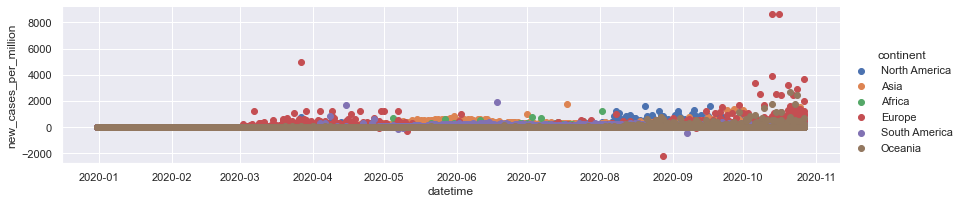

In [7]:
fg = sns.FacetGrid(data=dataset, hue='continent',aspect=4)
fg.map(plt.scatter, 'datetime', 'new_cases_per_million').add_legend()

Quina correlació entre aquests atributs hi veieu?


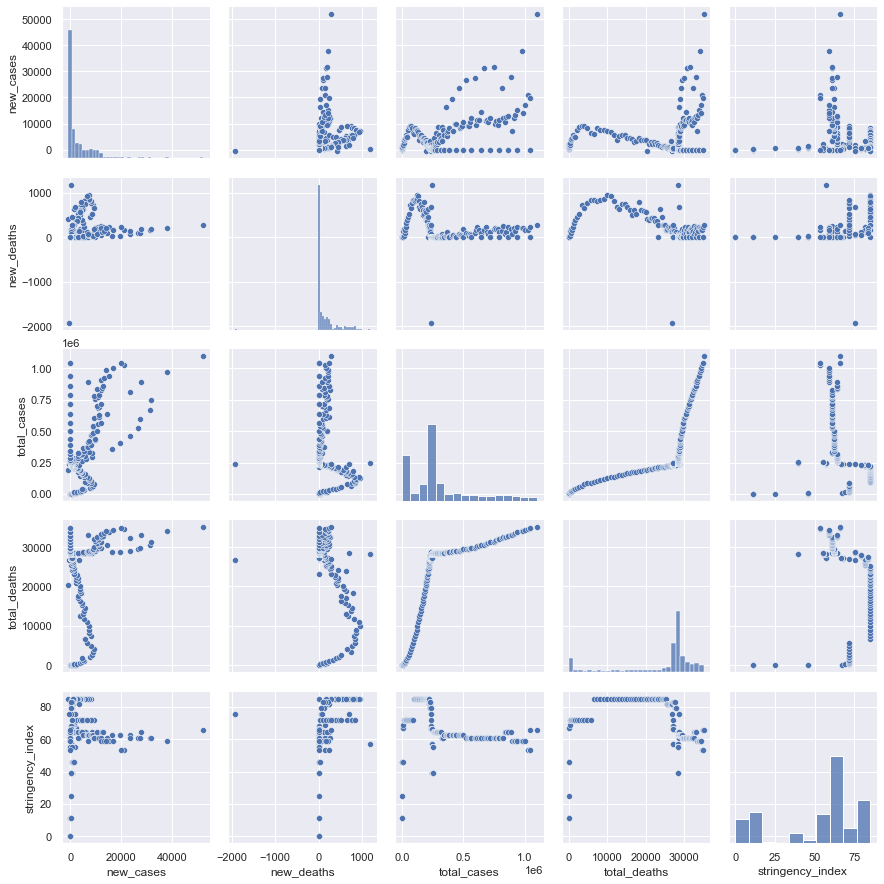

In [8]:
print("Quina correlació entre aquests atributs hi veieu?")

selected_columns = ["location", "new_cases", "new_deaths", "total_cases", "total_deaths", "stringency_index"]
sns.pairplot(covid_spain[selected_columns])
plt.show()

Què passa si utilitzem les dades smoothed?


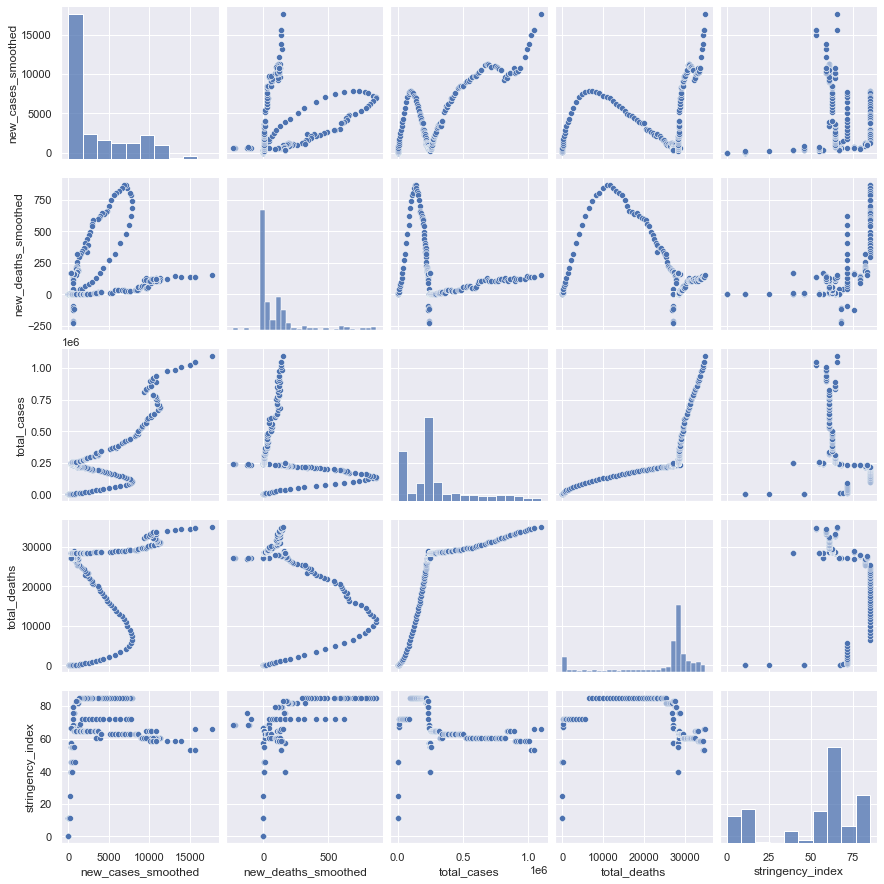

In [9]:
print("Què passa si utilitzem les dades smoothed?")

selected_columns = ["location", "new_cases_smoothed", "new_deaths_smoothed", "total_cases", "total_deaths", "stringency_index"]
sns.pairplot(covid_spain[selected_columns])
plt.show()

In [7]:
print("I si busquem alguna correlació entre paisos per un dia concret?")

covid_agost = dataset[dataset.date=="2020-08-01"]
covid_agost

I si busquem alguna correlació entre paisos per un dia concret?


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
159,AFG,Asia,Afghanistan,2020-08-01,36796.000,168.000,96.286,1287.000,12.000,5.286,923.700,4.217,2.417,32.308,0.301,0.133,0.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,78.700,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
759,OWID_AFR,NaN,Africa,2020-08-01,944997.000,16922.000,16605.714,19974.000,294.000,350.429,688.028,12.320,12.090,14.543,0.214,0.255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1373486472.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,ALB,Europe,Albania,2020-08-01,5396.000,120.000,108.429,161.000,4.000,3.857,1878.219,41.769,37.741,56.040,1.392,1.343,1.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,62.960,2872934.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,NaN,2.890,78.570,0.795,NaN,NaN,NaN,NaN
1935,DZA,Africa,Algeria,2020-08-01,30950.000,556.000,598.000,1223.000,13.000,11.000,693.688,12.462,13.403,27.411,0.291,0.247,0.960,64.000,1.434,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,79.630,44616626.000,17.348,29.100,6.211,3.857,13913.839,0.500,278.364,6.730,0.700,30.400,83.741,1.900,76.880,0.748,NaN,NaN,NaN,NaN
2517,AND,Europe,Andorra,2020-08-01,925.000,0.000,4.000,52.000,0.000,0.000,11958.011,0.000,51.710,672.234,0.000,0.000,1.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41.670,77354.000,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.970,29.000,37.800,NaN,NaN,83.730,0.868,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118323,VNM,Asia,Vietnam,2020-08-01,590.000,32.000,24.714,3.000,0.000,0.429,6.010,0.326,0.252,0.031,0.000,0.004,1.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,79.630,98168829.000,308.127,32.600,7.150,4.718,6171.884,2.000,245.465,6.000,1.000,45.900,85.847,2.600,75.400,0.704,NaN,NaN,NaN,NaN
119135,OWID_WRL,NaN,World,2020-08-01,17854849.000,250691.000,257277.000,718270.000,6125.000,6089.857,2267.292,31.834,32.670,91.209,0.778,0.773,1.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7874965732.000,58.045,30.900,8.696,5.355,15469.207,10.000,233.070,8.510,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN
119678,YEM,Asia,Yemen,2020-08-01,1730.000,2.000,8.000,494.000,1.000,2.857,56.739,0.066,0.262,16.202,0.033,0.094,0.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.480,30490639.000,53.508,20.300,2.922,1.583,1479.147,18.800,495.003,5.350,7.600,29.200,49.542,0.700,66.120,0.470,NaN,NaN,NaN,NaN
120244,ZMB,Africa,Zambia,2020-08-01,6228.000,265.000,271.429,165.000,14.000,3.714,329.164,14.006,14.346,8.721,0.740,0.196,1.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,50.930,18920657.000,22.995,17.700,2.480,1.542,3689.251,57.500,234.499,3.940,3.100,24.700,13.938

<AxesSubplot:>

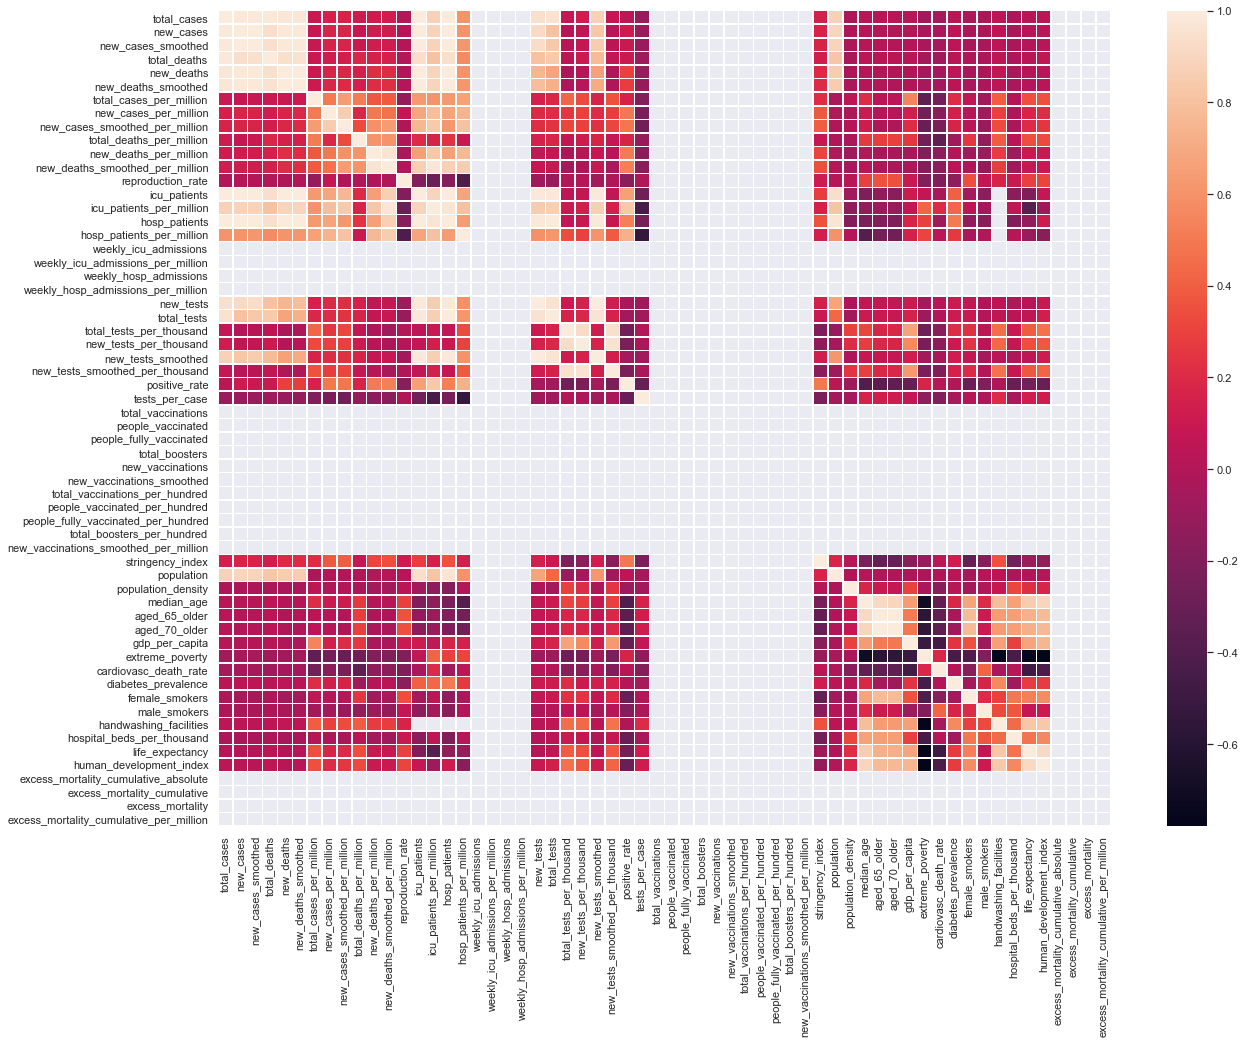

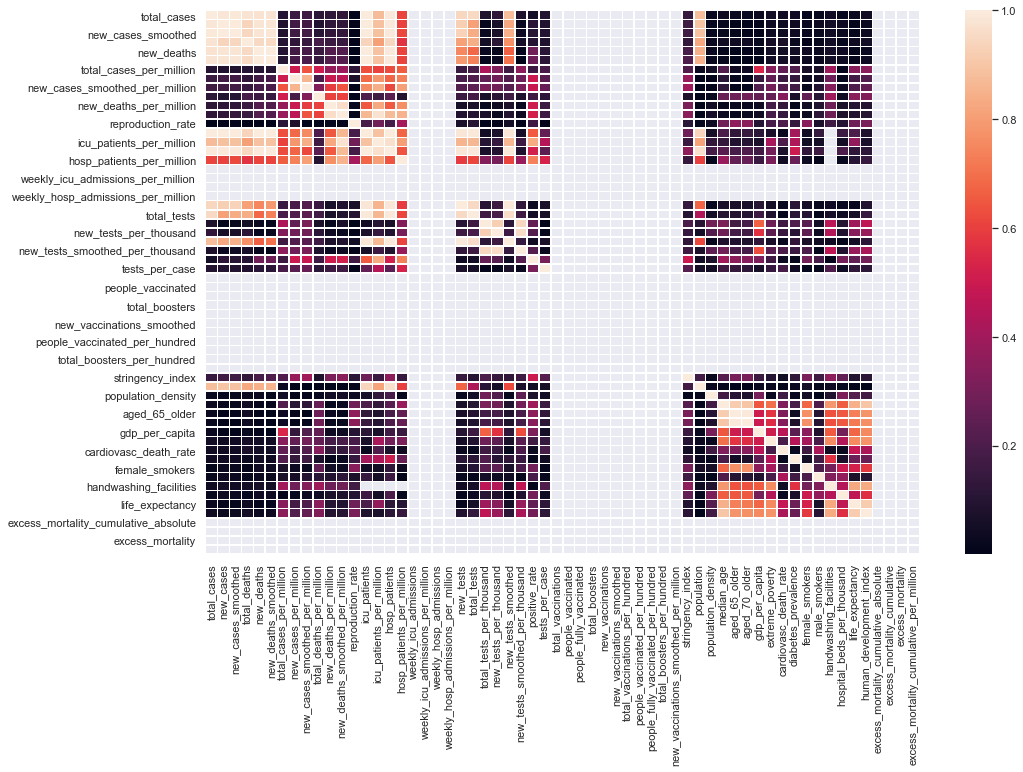

In [8]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(covid_agost.corr(), annot=False, fmt="f", linewidths=.5, ax=ax)
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(abs(covid_agost.corr()), annot=False, fmt="f", linewidths=.5, ax=ax)

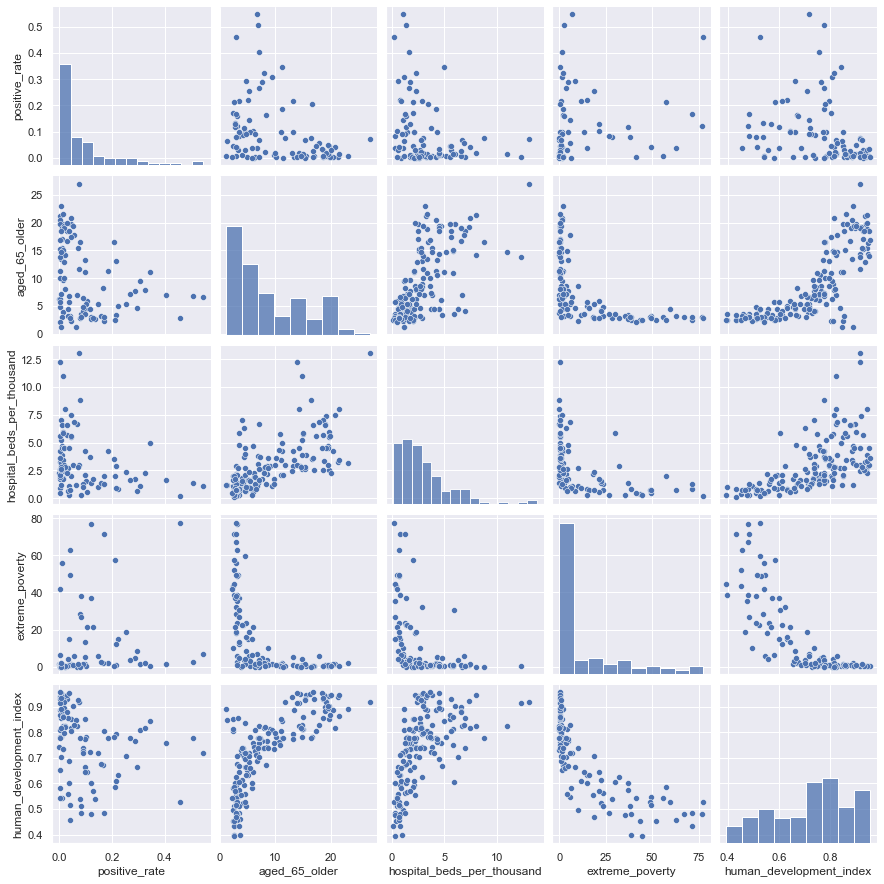

In [9]:
selected_columns = ["positive_rate", "aged_65_older", "hospital_beds_per_thousand", "extreme_poverty", "human_development_index"]
sns.pairplot(covid_agost[selected_columns])


A continuació, teniu unes funcions que de ben segur haurieu de completar per tal de poder respondre a les preguntes. Podeu implementar-les vosaltres mateixos i llavors comparar-les amb funcions de sklearn (si existeixen) 

In [8]:
from sklearn.model_selection import train_test_split
    
def mostra_correlacions(data):
    # TODO mostra les correlacions entre els atributs 
    correlacions = data.corr().abs()
    sol = (correlacions.where(np.triu(np.ones(correlacions.shape),k=1).astype(bool)).unstack().sort_values(ascending=False)).drop_duplicates().head(10)
    print(sol)
    
        
def normalitzador_de_dades(data):
    # TODO aplica algun tipus de normalitzador als atributs
    return data

def separar_train_test(data, target, ratio=0.8):
    # TODO retorna les dades en dos subconjunts diferents amb un ratio de 'ratio'
    data_train, data_val, target_train, target_val = train_test_split(data, target, test_size = 1-ratio)
    return data_train, data_val, target_train, target_val


def aplicar_regressor_lineal(data, target):
    prediccions = []
    # TODO aplica un regressor lineal amb les dades per predir el target
    return prediccions


def calcula_metrica_error(prediccions, target, tipus):
    # TODO utilitza varies metriques segons la var "tipus" que analitzin les prediccions
    if tipus == "mse":
        return 0
    elif tipus == "r2":
        return 0
    else:
        print ("Metrica {} no reconeguda".format(tipus))
        return -1


mostra_correlacions(dataset)

people_vaccinated                    total_vaccinations               0.995
aged_70_older                        aged_65_older                    0.995
total_deaths                         total_cases                      0.987
new_cases_smoothed                   new_cases                        0.987
people_vaccinated_per_hundred        total_vaccinations_per_hundred   0.983
new_vaccinations_smoothed            new_vaccinations                 0.982
people_fully_vaccinated_per_hundred  total_vaccinations_per_hundred   0.979
new_deaths_smoothed                  new_deaths                       0.977
weekly_hosp_admissions               icu_patients                     0.973
new_tests_smoothed                   new_tests                        0.972
dtype: float64


## A. Exploració de la base de dades (20%)

En aquest apartat aprendrem a analitzar les dades de la base de dades. Les següents funcions ens poden anar bé:

* [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
* [DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
* [DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
* [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Podeu veure algunes idees de 
https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction

Descripció dels camps:
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv



### Preguntes a respondre
1. Dimensionalitat de la BBDD. Quants exemples, quantes caracteristiques tenim.
2. Com són les caracteristiques?
3. Hi tenim totes les dades (quin % de dades tenim). Neteja les dades que puguin usar-se per aprendre.
4. Quin tipus de atributs tenim a la base de dades. Neteja les dades que ens siguin útils.
5. Mostra els atributs més rellevants. (llista de parelles d'atributs ordenada per correlació)
6. Quins atributs están més correlacionats. Mostra'ls.
7. Mostra (almenys) 3 tipus diferents de gràfiques sobre les dades.
8. Els valors es troben tots a la mateixa escala? Ens importa?
9. Quins atributs tenen una distribució Guassiana?
10. Quin és l'atribut objectiu? Per què?

#### Pregunta 1: Dimensionalitat de la BBDD. Quants exemples i característiques tenim?
En el nostre dataset, abans de fer cap procés de neteja/preprocessat tenim concretament 121238 observacions o exemples (files) i 65 variables o característiques, també coneguts com atributs (columnes).

In [3]:
dataset.shape

(121238, 65)

#### Pregunta 2: Com són les característiques?
Per veure una mica més de informació mirarem de quin tipus són les nostres característiques o atributs i veurem que tenim alguns atributs de tipus object i després tenim atributs numèrics de tipus continu. Veiem que aquest dataset ens dona una quantitat de informació molt extensa per cadascuna de les observacions que té, tot i que realment si l'analitzem una mica més a fons veurem que la gran majoria de les observacions no tenen valors en algun dels atributs que recull la BBDD (conté NaN's). Tot i així podem veure informació bastant diversa referent l'evolució diaria de la COVID-19 per continent i pais, que també ens dona oportunitat per fer un estudi més focalitzat en alguna d'aquestes regions concretes en comptes de fer-ho de tot el mon. Tot i així a les gràfiques exploratòries després veurem que Oceania, Sud Amèrica i Àfrica no tenen gaire informació si els comparem amb Europa, Nord Amèrica o Àsia, però tenim una quantitat d'informació interessant per poder treballar. 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121238 entries, 0 to 121237
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 121238 non-null  object 
 1   continent                                115714 non-null  object 
 2   location                                 121238 non-null  object 
 3   date                                     121238 non-null  object 
 4   total_cases                              115114 non-null  float64
 5   new_cases                                115111 non-null  float64
 6   new_cases_smoothed                       114096 non-null  float64
 7   total_deaths                             104318 non-null  float64
 8   new_deaths                               104473 non-null  float64
 9   new_deaths_smoothed                      114096 non-null  float64
 10  total_cases_per_million         

#### Pregunta 3: Hi tenim totes les dades? Quin percentatge de dades tenim realment? Neteja les dades que poguessim fer servir per aprendre.
Tot seguit mostraré la funció que he implementat per veure el percentatge de dades que tenim al nostre dataset, tant pel que fa al conjunt de informació real que disposem al dataset general com també per cadascún dels atributs. 
El percentatge de dades que manquen al nostre dataset com a dada no ens aporta gaire informació al meu parer perquè es bastant general, el problema és que tenim alguns atributs que tenen fins un 98% de valors inexistents mentre que en tenim d'altres amb un percentatge molt baix. Tot seguit mostro el percentatge de dades inexistents per atribut per tenir una mica més d'informació sobre aquells atributs o característiques que no ens aportaràn gaire interés per la nostra regressió per la poca informació que tenim. El nostre dataset té un 44,44% de valors inexistents en linies generals, mentre que hi tenim atributs amb un 0% i d'altres amb un 98,97% de valors inexistents. En la funció que mostrem tot seguit el que fem a més a més de mostrar aquesta informació és definir un percentatge de NaN's màxims per atribut que deixarem fixat per default en un 30%. Cada atribut que processem si té més d'un 30% de valors com a NaN no el considerarem, l'afegirem a una llista d'atributs irrellevants que després farem servir per treure'ls a l'hora de definir el nou dataset que continuarem netejant. 

In [3]:
#Aquí veiem el nombre de nans que tenim per atribut tot i que la instrucció 
#que hem ficat a sobre també ens diu els no nans per columna o variable...
def resum_dades_existents(dataset, percent_max_index = 0.3):
    print("Nombre de NaN's per atribut: \n--------------------")
    print(dataset.isna().sum().sort_values())
    atributs_mes_irrelevants = []
    nombre_valors = dataset.shape[0]*dataset.shape[1]
    percentatge_dades_inexistents = ((dataset.isna().sum().sort_values().sum())/nombre_valors)
    print("\n--------------------")
    print("Percentatge de valors inexistents al dataset: "+str(round(percentatge_dades_inexistents*100,2))+"%\n--------------------\n")
    pmi = percent_max_index*100
    for i,j in zip(dataset,dataset.isna().sum().sort_values()):
        percentatge = round((j/dataset.shape[0])*100,2)
        print(i+" - Percentatge de valors inexistents: "+str(percentatge)+"%\n")
        if percentatge > pmi:
            atributs_mes_irrelevants.append(i)
    
    return atributs_mes_irrelevants

atributs_irrelevants = resum_dades_existents(dataset,)

Nombre de NaN's per atribut: 
--------------------
iso_code                                   0
date                                       0
location                                   0
population                               862
continent                               5524
                                       ...  
total_boosters                        118268
weekly_hosp_admissions                119083
weekly_hosp_admissions_per_million    119083
weekly_icu_admissions_per_million     119984
weekly_icu_admissions                 119984
Length: 65, dtype: int64

--------------------
Percentatge de valors inexistents al dataset: 44.44%
--------------------

iso_code - Percentatge de valors inexistents: 0.0%

continent - Percentatge de valors inexistents: 0.0%

location - Percentatge de valors inexistents: 0.0%

date - Percentatge de valors inexistents: 0.71%

total_cases - Percentatge de valors inexistents: 4.56%

new_cases - Percentatge de valors inexistents: 5.05%

new_cases_smooth

#### Pregunta 4: Quin tipus d'atributs tenim a la BBDD? Neteja les dades que siguin útils.
Per veure una mica més de informació mirarem de quin tipus són les nostres característiques o atributs i veurem que tenim alguns atributs de tipus object (un d'ells de tipus datetime) i després tenim atributs numèrics de tipus continu (float64) que són la gran majoria, amb els quals treballarem. Tot seguit el que farem serà netejar el nostre dataset que és un procés fonamental que haurem de tenir molt en compte quan treballem amb un conjunt nou de dades en el futur per fer regressions i extreure informació rellevant. Amb els atributs discrets podriem treure també informació però jo he decidit no treure més d'un parell de gràfiques exploratòries amb ells. 
Aquí el que faig és tot el procés de neteja de dades. Fent servir la llista d'atributs irrellevants que hem comentat al darrer apartat ara el que faré serà:

En primer lloc el que faig és passar-li com a paràmetre una variança mínima que en el meu cas la escullo a 0.15 i calculo la variancia per cadascun dels atributs que tinc al dataset (les columnes). Aquesta variança minima em serveix com a threshold per després descartar aquells atributs que tinguin una variància massa petita. Quan la variància del atribut és més petita que el nostre threshold el que faig és afegir-lo a la llista d'atributs irrellevants que hem creat a la funció anterior. El per què d'això és una mica obvi, quan la variança és massa petita o molt propera a 0 el que tindrem és un atribut que no varia bàsicament, aleshores aquest atribut no ens aportarà informació rellevant pel nostre model i podrem prescindir d'ell. Aleshores tindrem un dataset sense tots aquests atributs (incloent aquells que vam afegir a la darrera funció on consideravem com irrellevants aquells que tinguéssin més d'un % concret de NaN's a les seves cel·les). 
    
Per un altra banda el que farem ara serà netejar el dataset a nivell d'observacions. Farem el mateix que a la darrera funció però a nivell de files en comptes de columnes. He decidit només considerar aquelles observacions o exemples que continguin com a màxim un 20% de NaN's com a valor als diferents atributs. Si les observacions tenen un percentatge més elevat de NaN's el que farem serà descartar-les. 

Un cop hem arribat fins aquí no som lliures de NaN's. El que resta fer ara amb totes aquelles observacions i atributs que han quedat és mirar si tenim NaN's i on els tenim. Ho farem mirant columna per columna. Comprovarem que aquests atributs siguin numèrics i llavors el que farem serà substituïr els valors NaN pel promig de la resta dels valors d'aquella columna. Realment aquí el que estem fent és inventar-nos dades, afegim una mica de soroll potser però no penso que sigui tant dolent tenint en compte la neteja tan ambiciosa de dades que hem fet i la gran quantitat de NaN's que ens hem tret de sobre. 

Un cop ha concluït el procés de neteja de les dades passem de tenir un dataset amb 121238 observacions (files) i 65 (columnes) atributs a tenir-ne un amb 56091 observacions (files) i 29 atributs (columnes).

In [4]:
def neteja_dataset(dataset, variança_minima, percent_nans_observacio, atributs_irrelevants):
    assert 0 < percent_nans_observacio < 1 and type(atributs_irrelevants)==list, "Expressa el percentatge de forma decimal (ex: 0.3) i que els atributs irrelevants estiguin en una llista"
    for i in dataset:
        if dataset[i].dtype in ["float64", "int64"]:
            variança = round(np.var(dataset[i], ddof=1),2)
            if variança < variança_minima and i not in atributs_irrelevants:
                atributs_irrelevants.append(i)
            
    dataset2 = dataset.copy()  
    dataset2.drop(atributs_irrelevants, axis=1, inplace=True)

    valors_minims = dataset2.shape[1] - (dataset2.shape[1]*percent_nans_observacio)
    dataset2 = dataset2.dropna(thresh=valors_minims, axis=0) 
 
    print("Ara el nostre dataset ha passat a tenir: "+str(dataset2.shape[0])+" files per "+str(dataset2.shape[1])+" columnes.\n-----------------\n")
    print("NaN's per atribut abans de substituir els restants per valors promig:\n")
    print(dataset2.isna().sum().sort_values()) 
    for i in dataset2: 
        if dataset2[i].dtype in ["float64", "int64"]:
            dataset2[i].fillna((dataset2[i].mean()), inplace=True)

    print("\n-----------------\nEns hem quedat finalment amb: "+str(dataset2.isna().sum().sort_values().sum())+" NaN's\n")
    
    return dataset2

dataset_p = neteja_dataset(dataset, 0.1, 0.35, atributs_irrelevants)

Ara el nostre dataset ha passat a tenir: 56091 files per 29 columnes.
-----------------

NaN's per atribut abans de substituir els restants per valors promig:

iso_code                                  0
continent                                 0
location                                  0
date                                      0
total_cases                               0
                                      ...  
icu_patients_per_million              42499
weekly_hosp_admissions                54005
weekly_hosp_admissions_per_million    54005
weekly_icu_admissions                 54871
weekly_icu_admissions_per_million     54871
Length: 29, dtype: int64

-----------------
Ens hem quedat finalment amb: 0 NaN's



#### Pregunta 5: Mostra els atributs més rellevants. Llista de parelles d'atributs en ordre de coeficient de correlació.
Els atributs més rellevants podem veure que són new_cases_smoothed amb new_cases, new_deaths amb new_deaths_smoothed, total_cases amb total_tests... 
Nota: La funció per treure les parelles d'atributs per ordre de coeficient de correlació l'hem ficat just abans del primer punt A. Allà tenim més funcions que farem servir al llarg d'aquest notebook. 


In [7]:
mostra_correlacions(dataset_p)

new_cases_smoothed               new_cases                0.972
new_deaths_smoothed              new_deaths               0.943
total_tests                      total_cases              0.937
total_deaths                     total_cases              0.930
hosp_patients                    icu_patients             0.926
new_cases_smoothed_per_million   new_cases_per_million    0.891
total_tests                      total_deaths             0.850
new_deaths_smoothed_per_million  new_deaths_per_million   0.841
new_deaths_smoothed              new_cases_smoothed       0.832
total_tests                      new_tests                0.826
dtype: float64


#### Pregunta 6: Quins atributs estàn més correlacionats? Mostra'ls. 
Aquesta pregunta potser l'he entès malament però crec que és una mica redundant, els atributs més correlacionats els acabem de veure tot just al darrer apartat. Aquests serien els que veiem just a sobre. Ficarem una matriu de correlació per si la pregunta volia veure amb més detall un resum general de tots aquells atributs amb el que ens hem quedat al nostre dataset netejat. Aquí si ens fixem no tindrem aquells atributs que no siguin numèrics, per això es que ens surten menys atributs a la matriu de correlació dels que hem dit que se'ns han quedat. Aquí a diferència del darrer apartat podem veure fins i tot una certa correlació negativa entre diferents atributs, això vol dir que mentre que un puja l'altre baixa, osigui és una relació de creixement invers diguessim. Dos atributs poden estar fortament correlacionats positiva o negativament. 


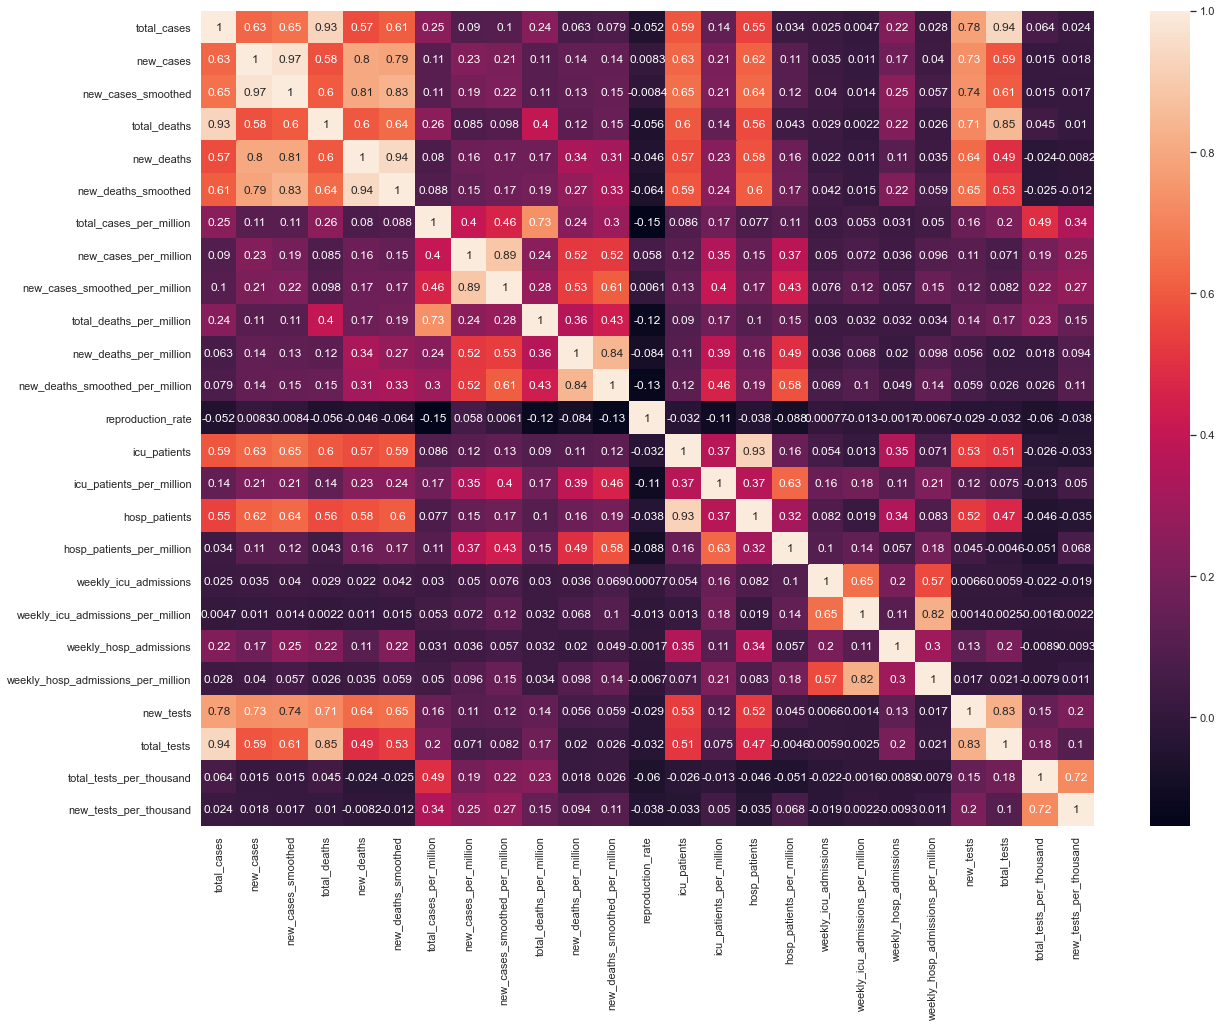

In [8]:

plt.figure(figsize = (20,15))
sns.heatmap(dataset_p.corr(),color = "k",annot = True)
plt.show()

#### Pregunta 7: Mostra 3 tipus diferents de gràfiques sobre les dades. 
Els 3 gràfics que he escollit són: un piechart que he vist a la xarxa i m'ha semblat interessant reproduïr amb aquestes dades on tenim com a sectors d'aquest cercle els diferents continents, a més gran siguin aquests sectors més dades dels total_cases representaràn, un gràfic de linies on veiem la tendència dels contagis diaris (nous casos) a europa concretament i finalment tenim un scatter plot representant el nombre de noves morts al eix "x" i nous casos al eix "y" agrupant aquests punts en el gràfic per continent un altre cop. Veiem que els dos continents que més dispersió tenen pel que fa a nous contagis elevats i morts elevades són tant Nord Amèrica com Àsia, mentre que Europa es manté bastant estable, 120.000 com a nombre màxim de nous casos diaris amb un nombre relativament petit de morts (200 aproximadament), també tenim alguns punts on ens mostra uns 40000 contagis i unes 1800 morts com a outliers interessants. Si ens fixem veurem alguns punts on tenim morts i/o contagis diaris negatius, això clarament està malament i són dades errònies que s'han acabat afegint a la BBDD. Amb mètodes més exhaustius de netejat i processat podriem establir un rang per atribut per controlar dades que no siguin coherents amb el que l'atribut realment mesura.

Al segon gràfic (línies) m'agradaria comentar també que veiem una funció bastant punxeguda, aquestes punxes les podriem treure fent per exemple un mostreig de punts per intervals per dir-ho així, podriem agafar punts de la funció definits a dintre d'un interval que nosaltres definim, com per exemple, en comptes de representar els nous contagis diaris que ens donarà un gràfic amb punxes bastant pronunciades el que podem fer és un promig cada dos dies, d'aquesta manera reduïrem aquest soroll que podem veure en les dades. Agrupariem les dades de dos en dos i fariem el promig d'aquestes dues, i així aconseguiriem tenir un gràfic més suavitzat, podriem també provar a fer-ho amb intervals més amplis (5 en 5) per reduïr més encara els canvis tant pronunciats d'un dia a un altre. 

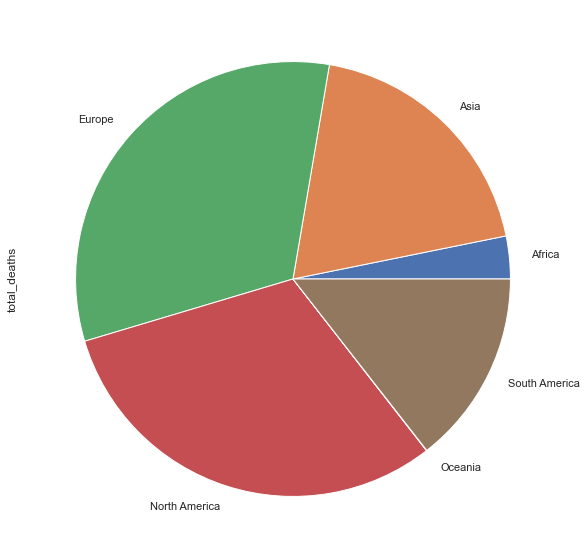

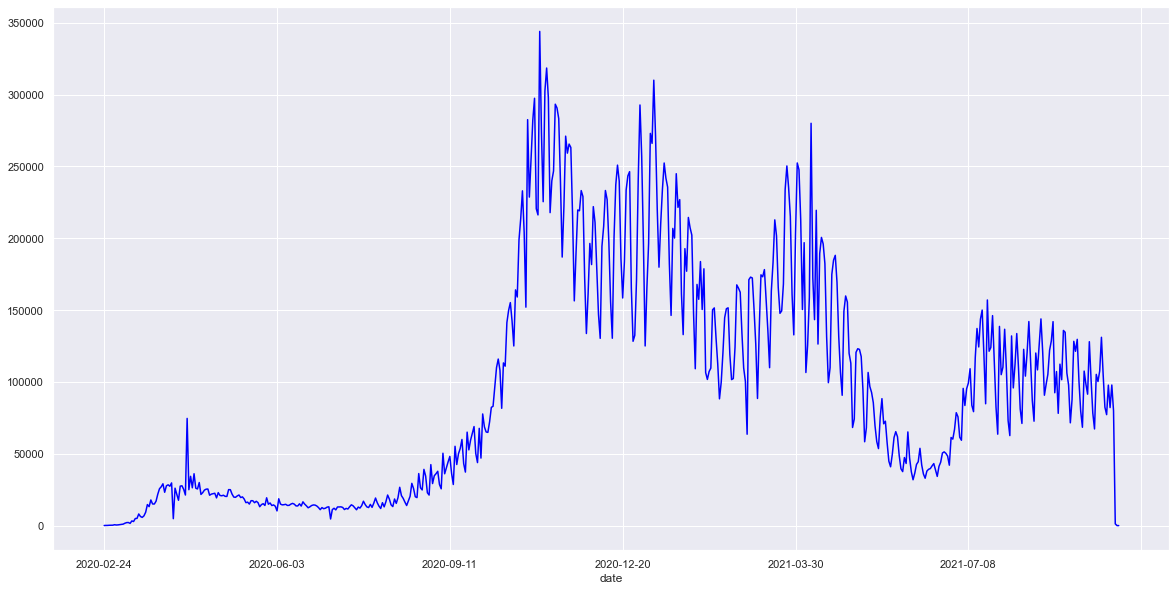

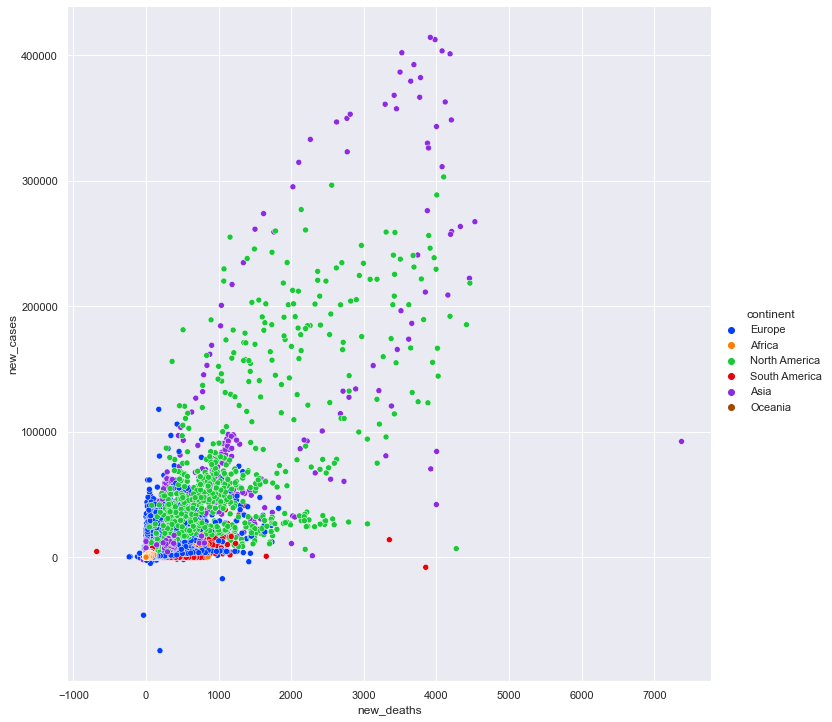

In [5]:
def dataset_plots(dataset):
#Si veiem ara els coeficients de correlació amb el heatmap veurem que tenim una redundància per exemple amb els atributs 
#new_cases y new_cases_smoothed, aporten la mateixa informació. El mateix ens passa amb new_tests y new_tests smoothed i amb 
#new_deaths i new_deaths_smoothed, són molt semblants també. D'aquests atributs els més importants que veig serien els següents:
    dataset.groupby("continent")["total_deaths"].sum().plot.pie(figsize = (10,10))
    plt.show()
    
    dataset[dataset['continent']=='Europe'].groupby("date")["new_cases"].sum().plot(color= "blue",figsize = (20,10))
    plt.show()
    
    plot_3 = sns.relplot(data=dataset, x="new_deaths", y="new_cases", hue ='continent', height=10, legend="full", palette = "bright")
    plt.show()
    
dataset_plots(dataset_p)

#### Pregunta 8: Els valors es troben tots a la mateixa escala? Ens importa?
No, els valors no es troben a la mateixa escala perquè si ens fixem veurem alguns atributs que representen les dades en milers o fins i tot en milions, aleshores l'escala depèn del atribut i no en tots ells es mouen en la mateixa escala. Jo penso que no ens importa perquè el propi atribut que representa les dades en milers o en milions té com a nom "... _per_thousand" per exemple. Aleshores en cas d'haver de predir valors per aquests atributs sabrem que estem parlant en milers o en milions. Mentre tinguem la referència en el nom del atribut per exemple no serà cap problema. L'únic que potser sigui un problema serà a l'hora de fer algun gràfic per exemple, doncs potser si ho tenim en escales diferents el gràfic no ens aportarà gaire informació al representar dos atributs per exemple. 
Potser amb una posterior normalització el que fem és "reescalar" les dades a un interval concret per poder interpretar millor les dades. 


#### Pregunta 9: Has trobat algún atribut amb distribució Gaussiana? Quins atributs tenen aquesta distribució?
Aquí he fet bastants histogrames i no he trobat res interessant en la majoria dels atributs, he intentat fer tests com els de normaltest que ens dona la llibreria scipy, el test shapiro o fins i tot el anderson-darling però o bé m'han donat errors que no he vist documentats enlloc o bé els valors no eren interessants. Tot i així en un histograma concret, al provar selectivament amb el atribut "reproduction_rate" he vist que aquest té una forma bastant semblant a una campana de Gauss. Aquest atribut llavors sembla seguir una distribució Gaussiana. M'agradaria tenir més informació sobre aquesta pregunta per part del professor per saber quin és el millor mètode o el més convenient per futurs analisis, potser hi algun altres que no hem vist mai...

(0.0, 2.3)

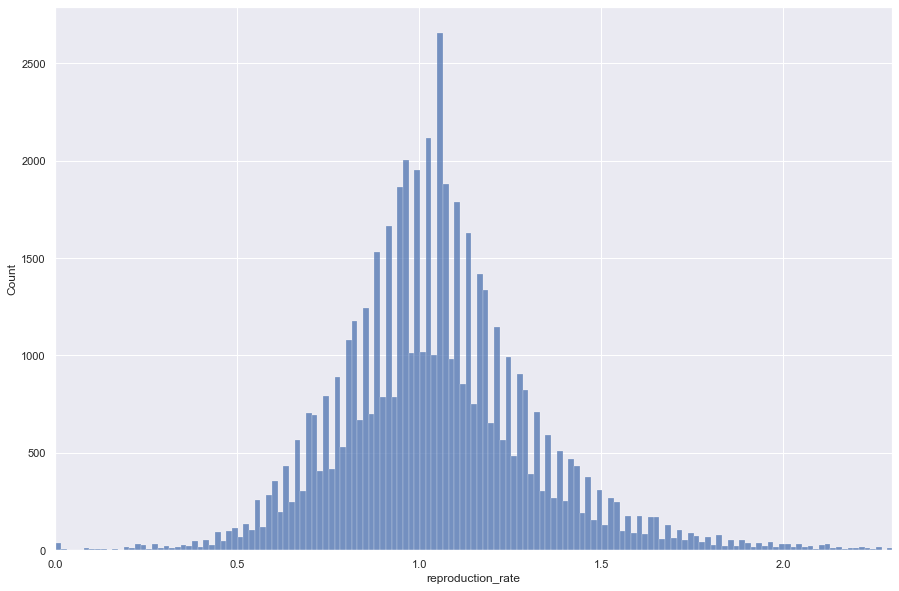

In [6]:
from scipy.stats import shapiro

def comprova_normal(dataset, target):
    dataset = dataset.iloc[:1000]
    alpha = 0.05
    print("\nShapiro-Test:\n--------------------\n")
    stat_sha, p_value_sha = shapiro(dataset[target])
    print("stat: "+str(stat_sha)+"  p_value: "+str(p_value_sha))
    if p_value_sha > alpha:
        print('Mostra sembla ser Gaussiana (no podem rebutjar H0)')
        return True
    else:
        print('Mostra no sembla Gaussiana (rebutjem H0)')
        return False
    
plt.figure(figsize = (15,10))    
sns.histplot(dataset_p["reproduction_rate"])
plt.xlim(0,2.3)

#### Pregunta 10: Quin és l'atribut objectiu? Per què? 
En aquest cas l'atribut objectiu serà aquell que més ens interessi predir. Per aquest atribut target montarem el model que veurem després. El atribut objectiu depèn realment de la informació que vulguem extreure de la BBDD, depèn de quin atribut volguem estudiar per fer unes prediccions o unes altres. En aquest cas el atribut objectiu serà new_cases, almenys jo treballaré amb aquest majoritariament ja que el que més ens interessa saber és el nombre de nous cassos que es produiran al proper dia. Des que va començar la pandèmia fins ara sempre s'ha parlat dels contagis diaris que es produien diariament, aquest atribut doncs ha estat bastant estudiat en tot moment, i quan tractem una base de dades com aquesta el que mes ens interessarà serà saber quants nous contagis tindrem pel següent dia, i també potser sigui interessant estudiar el nombre de morts que es produiràn ("new_deaths"). Però com he dit, tot depèn del que nosaltres volguem estudiar i predir. El més coherent en tot cas seria "new_cases". 

## B. Ús de regressor Lineal (40%)


Funcions a tenir en compte

* [data preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

* [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

* [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

* [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

* [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)



### Preguntes a respondre
0. Separa el conjunt d'aprenentatge i el de test. Els errors sempre seran sobre el de test.
1. Aprén un Regressor Lineal amb totes les característiques. Quins son els atributs més rellevants per a la regressió?
2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls. Estan relacionats amb la resposta anterior?
3. És millor o pitjor que utilitzant totes les dades? Per què?
4. Tenen alguna relació els atributs amb distribucions Gaussianes i els que tenen un error més petit?
5. Què passa si normalitzes les dades? El error és més baix? 
6. Significa això que el regressor és més precís? Passa el mateix amb altres mètriques?
7. Heu après un LinearRegression o un SGDRegressor? Sabeu quines diferencies hi ha? Compareu-los [Pista](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn-pandas)
8. Compara el resultat del punt 1 amb el descens del gradient, en error i temps d'entrenament.


##### Pregunta 0: Separa el conjunt d'aprenentatge i el de test:


In [9]:
def crea_conjunts_target_test(dataset_p, target):
    assert type(target)==str and target in list(dataset_p), "El target ha de ser el nom del atribut objectiu del dataset_p"
    atributs_regressio = []
    for i in dataset_p:
        if dataset_p[i].dtype in ["int64", "float64"] and i!=target:
            atributs_regressio.append(i)
    X = dataset_p[atributs_regressio]
    y = dataset_p[target]
    
    return X, y 

X, y = crea_conjunts_target_test(dataset_p, "new_cases")
data_train_r, data_val_r, target_train_r, target_val_r = separar_train_test(X, y,)

#### Pregunta 1: Aprén un regressor lineal amb totes les característiques. Quins són els atributs més rellevants per la regressió?
Veiem que els atributs més rellevants són el reproduction_rate o new_deaths_smoothed_per_million amb una forta correlació positiva així com new_tests_per_thousand per exemple que veiem que té una correlació negativa. 

In [10]:
from sklearn.linear_model import LinearRegression

def aplica_regressor_lineal(data_train, target_train, data_val):
    regr = LinearRegression()
    regr.fit(data_train, target_train)
    test_pred = regr.predict(data_val)
    
    return regr, test_pred

regr, test_pred = aplica_regressor_lineal(data_train_r, target_train_r, data_val_r)

print("Coeficients atributs (tetes):\n")
for i,j in zip(list(data_train_r),regr.coef_):
    print(str(i)+": "+str(j))


Coeficients atributs (tetes):

total_cases: -0.0005049165106104425
new_cases_smoothed: 1.043529064498556
total_deaths: 0.022110868210565744
new_deaths: 18.450438252400378
new_deaths_smoothed: -23.021471062722167
total_cases_per_million: 0.008036963791155911
new_cases_per_million: 13.389505337871725
new_cases_smoothed_per_million: -14.273569577387557
total_deaths_per_million: -0.5034403527475766
new_deaths_per_million: -260.5739250387501
new_deaths_smoothed_per_million: 352.07997766944607
reproduction_rate: 195.68303980318882
icu_patients: -0.062386479250425356
icu_patients_per_million: 4.698490927059394
hosp_patients: 0.016897305168747236
hosp_patients_per_million: -0.4473616716422035
weekly_icu_admissions: 0.8983798810431277
weekly_icu_admissions_per_million: -10.263042029066794
weekly_hosp_admissions: -0.2772903314444146
weekly_hosp_admissions_per_million: 4.0791760202034935
new_tests: 0.0013024644930138877
total_tests: 1.0796170969218366e-05
total_tests_per_thousand: -0.050794034163

#### Pregunta 2: Calcula l'error quadràtic mitjà del regressor per cadascún dels atributs. Quin és el que te l'error més baix? Mostra'ls. Estàn relacionats amb la resposta anterior?
Si veiem els atributs que ens donen un error més petit són els mateixos que abans ens han donat uns coeficients més alts per les diferents tetes del nostre model. Aquests són el reproduction_rate, new_deaths_smoothed_per_million, new_tests_per_thousand per exemple. En el apartat anterior hem vist que tenen una correlació molt forta, bé sigui positiva o negativa i això voldrà dir que al variar aquests valors tindrà un impacte molt fort sobre la nostra y, osigui la predicció, el target que estiguem predint. Aquests atributs aniràn doncs bastant lligats. Aquí però el que podem concloure és que...

In [11]:
from sklearn.metrics import mean_squared_error, r2_score 
import operator

def calcula_metrica_error(prediccions, target, tipus):
    # TODO utilitza varies metriques segons la var "tipus" que analitzin les prediccions
    if tipus == "mse":
        return mean_squared_error(target, prediccions)
    elif tipus == "r2":
        return r2_score(target_val, test_pred)
    else:
        print ("Metrica {} no reconeguda".format(tipus))
        return -1
    
diccionari_errors = {}
for i in dataset_p:
    if dataset_p[i].dtype in ["float64", "int64"]:
        X, y = crea_conjunts_target_test(dataset_p, i)
        data_train, data_val, target_train, target_val = separar_train_test(X, y,)
        _, test_pred = aplica_regressor_lineal(data_train, target_train, data_val)
        error = calcula_metrica_error(test_pred, target_val, "mse")
        diccionari_errors[i] = error
        
llista_menys_error = sorted(diccionari_errors.items(), key=operator.itemgetter(1))
print(llista_menys_error[:5])

print("\n\nError MSE de new_cases sense normalitzar: "+str(round(diccionari_errors["new_cases"],2)))

X, y = crea_conjunts_target_test(dataset_p, "new_cases")
data_train, data_val, target_train, target_val = separar_train_test(X, y,)
_, test_pred = aplica_regressor_lineal(data_train, target_train, data_val)
error = calcula_metrica_error(test_pred, target_val, "r2")

print("Coeficient de determinació sense normalitzar: "+str(error))

[('reproduction_rate', 0.08264535361848246), ('new_deaths_smoothed_per_million', 1.8268711887722746), ('new_deaths_per_million', 4.833541550864642), ('weekly_icu_admissions_per_million', 6.195332531265454), ('new_tests_per_thousand', 27.592389852277634)]


Error MSE de new_cases sense normalitzar: 8441574.56
Coeficient de determinació sense normalitzar: 0.9647027648141618


#### Pregunta 3: És millor o pitjor que utilitzant totes les dades? Per què?
Aquí podem canviar la mida del train/test per veure el impacte que això té sobre el nostre model i si és millor o no fer servir totes les dades. El train te un ratio determinat mentre que el test serà 1-ratio, aleshores si augmentem el test cada cop entrenarem amb menys dades. En el nostre cas al fixar un test de 80% el que fem és entrenar amb un 20% i quan més gran sigui el test més errors segurament hi hauràn per haver fet el entrenament amb un conjunt de dades més petit i viceversa. Aleshores a cada cop que augmentem el train el que farem serà molt probablement augmentar la precissió tot i que això també ens pot portar a un overfitting que més endavant comentarem i possiblement estiguem modelant les dades en excés, això tampoc ens interesse. El més important és fer-ho de forma equilibrada, és a dir, fer el entrenament amb un 75% de les dades per exemple i fer el test sobre el 25% restant, de forma que tinguem un model que s'ajusti bastant però que ens doni un cert marge acceptable d'errors. Aleshores no és ni millor ni pitjor diguéssim, es diferent el que estem fent a cada cop que augmentem la mida del train, hem de saber que això tampoc és el nostre objectiu, és clar que al augmentar el entrenament tindrem més precissió però això no sempre ens interessarà. S'ha de trobar el equilibri per construir un model robust, aleshores al meu parer el size pel train serà d'un 75-80% mentre que el test el podrem deixar en un 20-25%. 

#### Pregunta 4: Tenen alguna relació els atributs amb distribucions Gaussianes i els que tenen un error més petit?
Veiem que el atribut amb error més petit al darrer apartat és "reproduction_rate" i és el mateix que he trobat que té una tendència Gaussiana, aleshores diré que hi ha una relació entre els atributs que tenen un error més petit i que segueixen una gaussiana. 

#### Pregunta 5: Què passa si normalitzes les dades? El error és més baix?
Tot seguit implementarem un normalitzador, una funció que ens normalitzi les dades per cadascún dels nostres atributs o característiques del model per veure quin impacte té sobre el error. Fins ara hem estat treballant amb dades no normalitzades. En la meva funció on normalitzo les dades he implementat tant el mètode min-max (que encara podria perfeccionar més si afegeixo l'opció de demanar un rang per normalitzar) com el mètode mean_norm que hem vist a classe més a fons. Mostrem la sortida del error sobre l'atribut objectiu amb el que hem estat treballant majoritariament com és "new_cases" i veiem que disminueix molt el error un cop normalitzem les dades del nostre dataset. El error efectivament no te res a veure amb el que hem vist abans sense normalitzar. 

In [12]:
def normalitzador_de_dades(data, metode_normalitzacio):
    assert type(metode_normalitzacio)==str, "Has d'especificar un mètode de normalització en format string"
    nou_dataset = data.copy()
    if metode_normalitzacio == 'min_max':
        for i in data.columns:
            if data[i].dtype in ["float64", "int64"]:
                maxim, minim = data[i].max(), data[i].min()
                nou_dataset[i] = (data[i] - minim)/(maxim-minim) 
#Aquí podriem normalitzar per un rang [a,b] multiplicant a l'expressió que tenim a sobre per (b-a)

        return nou_dataset
    
    elif metode_normalitzacio == 'mean_norm':
        for i in data.columns:
            if data[i].dtype in ["float64", "int64"]:
                nou_dataset[i] = (nou_dataset[i] - nou_dataset[i].mean())/ nou_dataset[i].std()
            
        return nou_dataset 
    
    else:
        print ("Metrica {} no reconeguda".format(metode_normalitzacio))
        return -1 

dataset_pn = normalitzador_de_dades(dataset_p, "min_max")
X, y = crea_conjunts_target_test(dataset_pn, "new_cases")
data_train_rn, data_val_rn, target_train_rn, target_val_rn = separar_train_test(X, y,)
_, test_pred_rn = aplica_regressor_lineal(data_train_rn, target_train_rn, data_val_rn)
error = calcula_metrica_error(test_pred_rn, target_val_rn, "mse")
print("Error MSE de new_cases normalitzat amb min_max: "+str(error))
dataset_pn = normalitzador_de_dades(dataset_p, "mean_norm")
X, y = crea_conjunts_target_test(dataset_pn, "new_cases")
data_train_rn, data_val_rn, target_train_rn, target_val_rn = separar_train_test(X, y,)
_, test_pred_rn = aplica_regressor_lineal(data_train_rn, target_train_rn, data_val_rn)
error = calcula_metrica_error(test_pred_rn, target_val_rn, "mse")
print("Error MSE de new_cases normalitzat amb mean_norm: "+str(error))

Error MSE de new_cases normalitzat amb min_max: 2.784825733856092e-05
Error MSE de new_cases normalitzat amb mean_norm: 0.0260829579914331


#### Pregunta 6: Significa això que ara el nostre regressor és més precís? Passa el mateix amb altres mètriques? 
No, de fet si ens fixem amb el coeficient de determinació del nostre regressor segueix sent el mateix. No hi tenim un guany de precissió. El que ens ajuda a treure de la nostra BBDD la normalització són algunes anomalies concretes que es produeixen en les dades que fa que siguin més dificils de fer servir per nosaltres. Ens acota les dades en un rang una mica més manegable. 

In [13]:
dataset_pn = normalitzador_de_dades(dataset_p, "mean_norm")
X, y = crea_conjunts_target_test(dataset_pn, "new_cases")
data_train_rn, data_val_rn, target_train_rn, target_val_rn = separar_train_test(X, y,)
_, test_pred_rn = aplica_regressor_lineal(data_train_rn, target_train_rn, data_val_rn)
error_r2 = calcula_metrica_error(test_pred_rn, target_val_rn, "r2")
print("Coeficient de determinació normalitzat mean-norm: "+str(error_r2))

Coeficient de determinació normalitzat mean-norm: 0.9647027648141618


#### Pregunta 7: Heu après un LinearRegression o un SGDRegression? Sabeu quina diferència hi ha? Compareu-los.
Hem treballat amb un regressor lineal de tipus Linear Regression que hem importat amb la llibreria sklearn.linear_model el qual treballa amb mínims quadrats ordinaris i segueix un model lineal que té com a únic objectiu el minimitzar la suma residual dels quadrats dels errors que es produeixen entre els punts que s'han predit amb el regressor i els punts reals que tenim al conjunt de dades. El SGD el que canvia és que fa servir un descens estocàstic del gradient que s'estima la pèrdua a cada mostra i el model es va actualitzant al llarg de les iteracions. 

#### Pregunta 8: Compara el resultat del punt 1 amb el descens del gradient, en error i temps d'entrenament. 
Aquí he estat provant el SGDRegressor i he cercat informació a la xarxa sobre que fan els paràmetres que podem redefinir per executar-lo i amb algunes proves, tant pel que fa als valors que per default venen fixats al crear el nostre regressor així com fent servir els models de ridge i lasso amb un elasticnet i ficant el nombre d'iteracions més elevat he vist que l'error em surt més gran que amb el LinearRegressor. Si veiem els resultats de la pregunta 5 d'aquesta secció del notebook veurem que el error MSE de new_cases normalitzat amb un mean_norm (condicions que fiquem en aquest SGDRegressor també) fent servir un LinearRegressor és més petit que el que ens surt en aquest apartat (0,029 vs 0,046). La diferència realment és molt petita però he vist que l'error del SGD mai arriba a estar per sota del Linear. 
El SGD també ens dona molt bons resultats i de fet aquesta tècnica és computacionalment més convenient que no pas el Linear model on hem de calcular la inversa del producte de X´X, càlcul bastant pesat. Computacionalment és més ràpid i eficient fer servir el SGD en molts casos pel que he estat llegint perquè el descens estocàstic del gradient ens estalvia bastants càlculs i fins i tot hi han implementacions que fan servir aquest descens del gradient on només han de mantenir en memòria una part relativament petita de les dades fent que els requeriments en memòria siguin menys exigents i fins i tot té una paral·lelització més trivial que no pas el Linear model, i concretament el camp que tractem com és aprenentatge computacional on tenim un gran nombre de variables encara fa resaltar més aquestes característiques a mesura que augmenta la dimensionalitat per problemes més complexos. 

In [14]:
from sklearn.linear_model import SGDRegressor

dataset_pn_sgd = normalitzador_de_dades(dataset_p, "mean_norm")
X, y = crea_conjunts_target_test(dataset_pn_sgd, "new_cases")
data_train_sgd, data_val_sgd, target_train_sgd, target_val_sgd = separar_train_test(X, y,)
regr_SGD = SGDRegressor(penalty="elasticnet", alpha=0.01, l1_ratio=0.5, max_iter=10000)
regr_SGD.fit(data_train_sgd, target_train_sgd)
test_pred_sgd = regr_SGD.predict(data_val_sgd)
error_sgd = calcula_metrica_error(test_pred_sgd, target_val_sgd, "mse")
    
print("Error MSE de new_cases normalitzat amb mean_norm fent servir SGD: "+str(error_sgd))

Error MSE de new_cases normalitzat amb mean_norm fent servir SGD: 0.04219496048875601


## C. Demostració d'assoliment (A+B en una nova BBDD) (20%)

La puntuació d'aquesta secció dependrà de la originalitat, i el treball realizat l'analisis i procesat d'una base de dades alternativa de lliure elecció. Recordeu que podeu reaprofitar la majoria del codi si ho heu implementat en funcions.


##### Carreguem les dades (fitxer .csv)

In [15]:
computer_data = load_dataset("Computer_Data.csv")
computer_data

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


## Apartat A

#### Pregunta 1: Dimensionalitat de la BBDD. Quantes observacions i atributs tenim.
Veiem que tenim una dimensionalitat de 6259x11, és a dir, 6259 observacions o exemples i 11 atributs o característiques.

In [16]:
computer_data.shape

(6259, 11)

#### Pregunta 2: Com són les característiques?
Aquest dataset és de atributs o especificacions d'ordinadors, tenim com a característiques la velocitat, ram i polsades de pantalla per exemple. També tenim alguns atributs categòrics que ens indiquen si té lector per cd's per exemple. Tots els atributs són de tipus numèric "int64", excepte els atributs "cd", "multi" i "premium" que són tipus objecte però el que farè serà binaritzar-los per poder fer-los servir a l'hora de calcular el regressor lineal. 
Si ens fixem en la propera instrucció que mostrem veurem que per atribut tenim 6259 valors no null, el que voldrà dir que totes les observacions tenen valors per tots i cadascún dels atributs. Dit d'una altra manera, no tenim cap NaN del que preocupar-nos, fet que ens facilita la feina des d'un inici. 

In [17]:
computer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


#### Pregunta 3: Hi tenim totes les dades? Quin percentatge de dades tenim al dataset? Neteja les dades que es puguin fer servir per aprendre. 
La resposta que hem donat a la qüestió anterior ja serveix com a resposta per aquesta pregunta també. No tenim cap NaN, si ens fixem amb la comanda que hem mostrat veurem que tots els atributs tenen com a nombre de valors no NaN el mateix nombre d'observacions que tenim al dataset, el que significarà que tenim el 100% de les dades. No hem de fer cap procés de neteja per ara. 

In [18]:
percentatge_dades_inexistents = ((computer_data.isna().sum().sort_values().sum())/(computer_data.shape[0]*computer_data.shape[1]))
print("Percentatge de valors inexistents al dataset: "+str(round(percentatge_dades_inexistents*100,2)))

Percentatge de valors inexistents al dataset: 0.0


#### Pregunta 4: Quin tipus d'atributs tenim a la base de dades? Neteja les dades que es puguin fer servir. 
Com tot just hem dit, tenim 11 atributs en total a la base de dades dels quals 8 són numèrics de tipus int64 i 3 d'ells son de tipus object (categòrics). El que farem tot seguit serà binaritzar aquests atributs categòrics que només tenen dos nivells per tal de poder fer un model amb una regressió lineal. Suposo que es podrà fer amb alguna funció ja implementada en pandas, però ho he fet amb un simple for que cridés a la funció que he implementat per binaritzar les entrades depenent de si tenien un yes o un no en aquells atributs binaris. De segur que no és el mètode més eficient per fer-ho però per aquest cas no és dolent, si tinguessim un dataset més gran aleshores miraria d'invertir més temps per tal d'escriure un codi més eficient per fer-ho en un temps raonable. 

Si ens fixem amb el dataset veurem que tenim una columna duplicada. La primera columna no té nom i simplement ens indica el índex de cadascuna de les observacions o files, el que faré serà treure aquesta fila donat que no ens aporta gaire informació. 

Un cop tenim tots els atributs en format numèric ara ja podem passar a mirar una mica de fer algun càlcul/mètrica i regressió per fer prediccions i calcular la precissió del model i el seu error. 


In [19]:
def binaritza_atributs_categorics_2d(dataset_comp, atribut):
    for i,j in enumerate(computer_data[atribut]):
        if j=="no":
            dataset_comp[atribut][i] = 0
        
        elif j=="yes":
            dataset_comp[atribut][i] = 1

atributs = ["cd", "multi", "premium"]
for i in atributs:
    binaritza_atributs_categorics_2d(computer_data, i)
    computer_data[i] = computer_data[i].astype("int64")
        

computer_data_proc = computer_data.drop(computer_data.columns[0], axis=1)

computer_data_proc.info()

<ipython-input-19-77bcd104f53a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_comp[atribut][i] = 0
<ipython-input-19-77bcd104f53a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_comp[atribut][i] = 1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    6259 non-null   int64
 1   speed    6259 non-null   int64
 2   hd       6259 non-null   int64
 3   ram      6259 non-null   int64
 4   screen   6259 non-null   int64
 5   cd       6259 non-null   int64
 6   multi    6259 non-null   int64
 7   premium  6259 non-null   int64
 8   ads      6259 non-null   int64
 9   trend    6259 non-null   int64
dtypes: int64(10)
memory usage: 489.1 KB


#### Pregunta 5: Mostra els atributs més rellevants. Parelles ordenades pel seu coeficient de correlació. 
Podem veure que els atributs més rellevants semblen ser la ram i el hd, seguit del trend o del speed. Més endavant veurem quin efecte tenen sobre el nostre model. No sembla que tinguem tampoc una forta correlació entre els atributs, també és veritat que no en tenim molts però només hi han tres parelles per sobre el 0,5.

In [20]:
mostra_correlacions(computer_data_proc)

ram    hd      0.778
       price   0.623
trend  hd      0.578
cd     hd      0.504
trend  cd      0.446
cd     ram     0.439
multi  cd      0.432
hd     price   0.430
trend  speed   0.405
hd     speed   0.372
dtype: float64


#### Pregunta 6: Quins atributs estàn més correlacionats? Mostra'ls. 
Com hem dit abans, els atributs més correlacionats serien ram-hd, ram-price, trend-hd o hd-price. Tot seguit mostro una matriu de correlacions perquè es puguin veure tots els coeficients de correlació entre les diferents variables. 

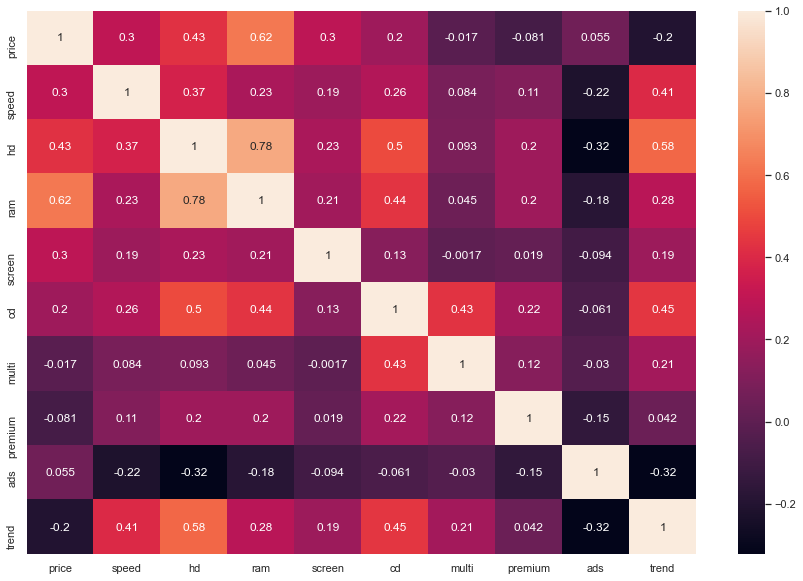

In [21]:
plt.figure(figsize = (15,10))
sns.heatmap(computer_data_proc.corr(),color = "k",annot = True)
plt.show()

#### Pregunta 7: Mostra tres tipus diferents de gràfiques sobre les dades. 
En el primer gràfic el que mostrem és la distribució dels diferents ordinadors on representem al eix vertical el preu i al horitzontal la resolució hd, a més a més els marquem amb un color diferent segons la quantitat de memòria ram que aquests tinguin i fem que la mida del punt sigui més gruixut o menys depenent la velocitat del processador. 

Al segon gràfic tenim un piechart on agrupem per categoria de ram la suma de tots els ordinadors d'aquella categoria. Veiem que els 2gb de ram estàn efectivament en minoria, bastant obsolets mentre que els de 8 gb dominen el mercat sobre ser una quantitat que per algunes tasques més exigents com el gaming o la computació d'altes prestacions es queden bastant curts. També veiem que els ordinadors de 16 gb i 24 gb tenen un terreny important mentre que els de 32 gb semblen ser bastant pocs. 

Finalment el que fem és fer un histograma sobre el nombre d'ordinadors que tenim a la nostra BBDD segons nivell de tendència. Casualment veiem que la distribució d'aquestes dades s'assembla a una Gaussiana. 

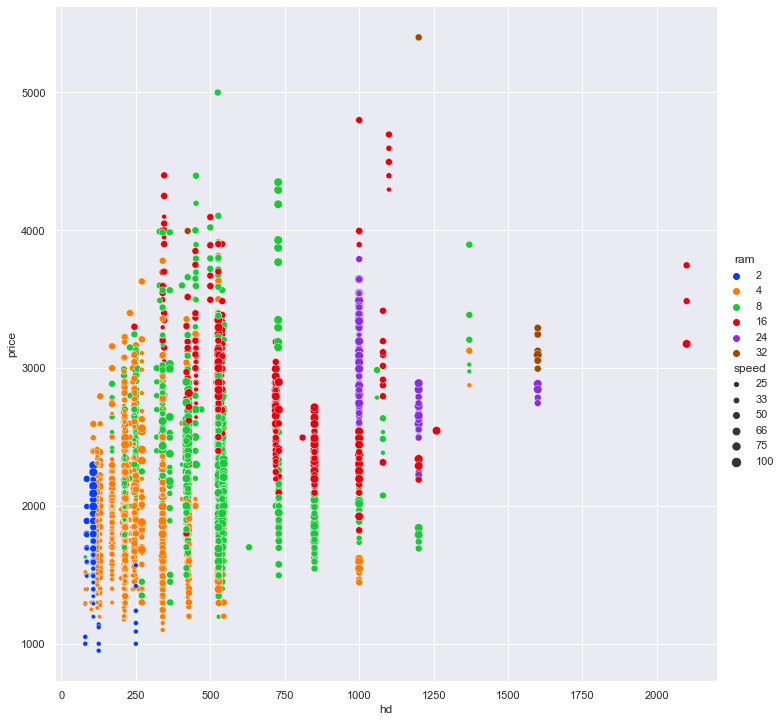

In [22]:
plot_3 = sns.relplot(data=computer_data_proc, x="hd", y="price", hue ='ram', height=10, legend="full", palette = "bright", size="speed")
plt.show()

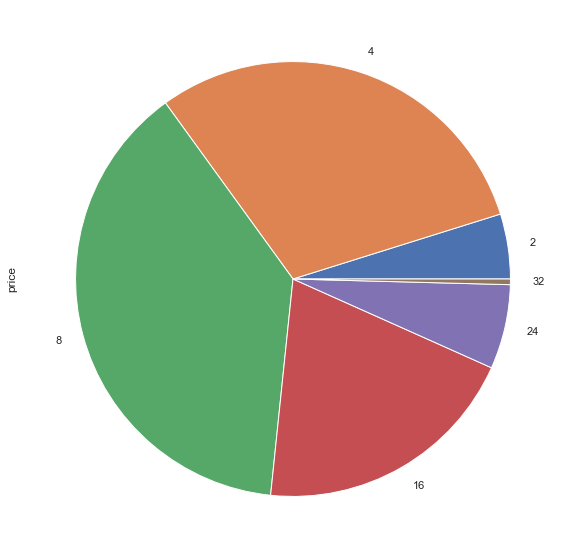

In [159]:
computer_data_proc.groupby("ram")["price"].sum().plot.pie(figsize = (10,10))
plt.show()

<AxesSubplot:xlabel='trend', ylabel='Count'>

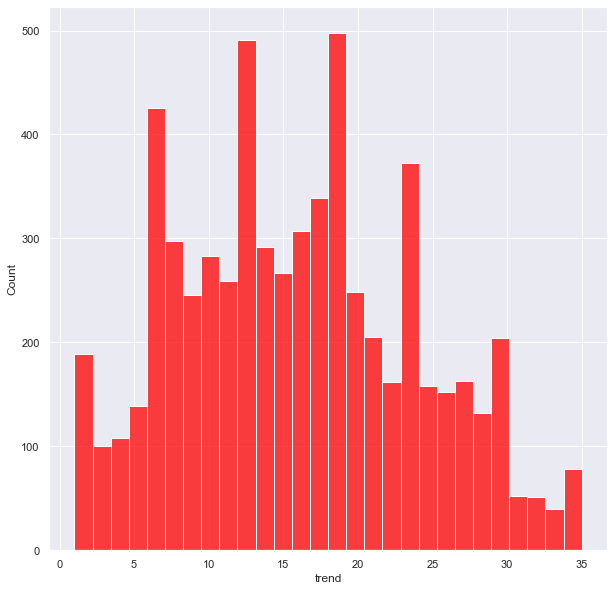

In [161]:
plt.figure(figsize=(10,10))
sns.histplot(data=computer_data_proc, x="trend", color="red")

#### Pregunta 8: Els valors dels atributs es troben tots a la mateixa escala? 
No, no tots els valors dels atributs es troben a la mateixa escala perquè cadascún mesura una cosa diferent, mentre que el atribut screen mesura la mida de la pantalla molt probablement en polzades, tenim el atribut ram que medeix la quantitat de gigues de ram que té cadascún dels ordinadors, tenim també atributs binaris que només ens codifiquen si presenten una característica o no. Tot això no ens importa de moment, no ens dona cap problema a l'hora de montar el nostre model i fer prediccions.   

#### Pregunta 9: Quins atributs tenen distribució Gaussiana? 
De tots els atributs l'únic que sembla seguir una campana de Gauss pel que fa a la seva distribució és l'atribut trend. Només tenim aquest en el dataset que hem escollit. 

#### Pregunta 10: Quin és l'atribut objectiu en aquest cas? Per què? 
En aquest cas l'atribut objectiu serà el preu del ordinador, aquest serà el nostre target sobre el qual farem prediccions i calcularem l'error i la precissió del model. Realment tot depèn del que ens interessi estudiar, podriem escollir un altre atribut com a target, però sempre hi han uns més interessants que d'altres, en aquest cas és obvi que ens interessa saber més el preu dels equips.

## Apartat B

#### Pregunta 0: Separa el conjunt d'aprenentatge i el de test. 
Tot seguit reaprofitem el codi que haviem fet abans per crear els conjunts de train i test i canviem el atribut objectiu a price. 

In [48]:
def crea_conjunts_target_test(dataset_p_computer, target):
    assert type(target)==str and target in list(dataset_p_computer), "El target ha de ser el nom del atribut objectiu del dataset_p"
    atributs_regressio = []
    for i in dataset_p_computer:
        if dataset_p_computer[i].dtype in ["int64", "float64"] and i!=target:
            atributs_regressio.append(i)
    X = dataset_p_computer[atributs_regressio]
    y = dataset_p_computer[target]
    
    return X, y 

X_c, y_c = crea_conjunts_target_test(computer_data_proc, "price")
data_train_rc, data_val_rc, target_train_rc, target_val_rc = separar_train_test(X_c, y_c,)

#### Pregunta 1: Aprèn un regressor lineal amb totes les característiques. Quins són els atributs més rellevants per la regressió. 
Els dos atributs més rellevants per la regressió seràn el atribut screen i premium. Tot seguit mostrem els coeficients (tetes) del nostre regressor lineal:

In [51]:

regr_rc, test_pred_rc = aplica_regressor_lineal(data_train_rc, target_train_rc, data_val_rc)

print("Coeficients atributs (tetes):\n")
for i,j in zip(list(data_train_rc),regr_rc.coef_):
    print(str(i)+": "+str(j))

Coeficients atributs (tetes):

speed: 9.327731429010239
hd: 0.7487456438281976
ram: 48.99344873896544
screen: 125.3820883507695
cd: 70.63591161255651
multi: 96.72220701766808
premium: -506.65128728499013
ads: 0.6533527732174104
trend: -51.77389569652827


#### Pregunta 2: Calcula l'error quadràtic mitjà per cadascún dels atributs. Quin és el que té l'error més baix? Mostra'ls. Estàn relacionats amb la pregunta anterior?
Aquí veiem que els atributs més importants per la regressió (amb coeficients més grans) tenen també els errors més baixos, aleshores sí, estàn relacionats amb els que hem vist a la darrera pregunta.

In [52]:
diccionari_errors_e = {}
for i in computer_data_proc:
    if computer_data_proc[i].dtype in ["float64", "int64"]:
        X_e, y_e = crea_conjunts_target_test(computer_data_proc, i)
        data_train_e, data_val_e, target_train_e, target_val_e = separar_train_test(X_e, y_e,)
        _, test_pred_e = aplica_regressor_lineal(data_train_e, target_train_e, data_val_e)
        error_e = calcula_metrica_error(test_pred_e, target_val_e, "mse")
        diccionari_errors_e[i] = error_e
        
llista_menys_error = sorted(diccionari_errors_e.items(), key=operator.itemgetter(1))
print(llista_menys_error[:5])

print("\n\nError MSE de price sense normalitzar: "+str(round(diccionari_errors_e["price"],2)))

X_e, y_e = crea_conjunts_target_test(computer_data_proc, "price")
data_train_e, data_val_e, target_train_e, target_val_e = separar_train_test(X_e, y_e,)
_, test_pred_e = aplica_regressor_lineal(data_train_e, target_train_e, data_val_e)
error_e = calcula_metrica_error(test_pred_e, target_val_e, "r2")

print("Coeficient de determinació sense normalitzar: "+str(error))

[('premium', 0.06599674859308265), ('multi', 0.08709935506023425), ('cd', 0.1328604281695406), ('screen', 0.6782849623047181), ('ram', 8.001966088406187)]


Error MSE de price sense normalitzar: 81281.99
Coeficient de determinació sense normalitzar: 0.0260829579914331


#### Pregunta 3: És millor o pitjor que utilitzant totes les dades? Per què?

Com hem dit quan hem analitzat el dataset donat pel professor, no és ni millor ni pitjor, el fet d'augmentar la mida del train o del test té un impacte després sobre el model que farem servir per fer prediccions. Si destinem un gran nombre de les dades per fer training doncs és clar que tindrem un model bastant precís però potser estiguem modelant les dades més que muntant un model per predir-les tenint un cert marge d'error que és potser el que ens interesse. Si en canvi augmentem massa la mida del test doncs el que fem és entrenar amb menys dades i això ens pot portar a perdre precissió. Aleshores aquí tot és qüestió d'agafar una mida equilibrada per cadascún d'aquests, osigui fer un entrenament amb un conjunt relativament gran de dades com un 70-80% de les dades pel train i la resta pel test. D'aquesta forma ens hauria de quedar un model amb una precissió bona i no estariem modelant les dades que és el que no volem en cas de fixar el train al 90% per exemple. 

#### Pregunta 4: Té alguna relació l'atribut amb una distribució Gaussiana i els que tenen el error més petit?
El atribut que en aquest dataset aproximava una distribució gaussiana era el atribut anomenat trend, la forma del histograma d'aquest atribut tenia forma de campana de Gauss. Ara bé, al calcular els errors quadràtics mitjans per atribut no es troba en aquest cas entre els cinc primers.

#### Pregunta 5: Què passa si normalitzo les dades? Surt l'error més baix?
Com podem veure a sota veiem que l'error baixa realment bastant normalitzant amb un mean_norm, he agafat codi que havia implementat a les altres preguntes.

In [53]:

computer_data_proc_norm = normalitzador_de_dades(computer_data_proc, "mean_norm")
X_n, y_n = crea_conjunts_target_test(computer_data_proc, "price")
data_train_n, data_val_n, target_train_n, target_val_n = separar_train_test(X_n, y_n,)
_, test_pred_n = aplica_regressor_lineal(data_train_n, target_train_n, data_val_n)
error_n = calcula_metrica_error(test_pred_n, target_val_n, "mse")
print("Error MSE de new_cases normalitzat amb mean_norm: "+str(error))

error_e = calcula_metrica_error(test_pred_n, target_val_n, "r2")
print("Coeficient de determinació amb dades normalitzades: "+str(error))

Error MSE de new_cases normalitzat amb mean_norm: 0.0260829579914331
Coeficient de determinació amb dades normalitzades: 0.0260829579914331


### Preguntes 6 i 7 - La resposta és la mateixa que les que hem donat abans, no hi ha res particular per fer servir un nou dataset.


## D. Implementació Regressor Lineal (20%)

En aquest exercici, es tracta d'implementar en python el procés de descens del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(\theta) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; \theta) - y^{i})^2 + \lambda\sum_{j=1}^{n}(\theta_{j}^2) \right]$$

Fixeu-vos que $J$ retorna el `mse`. Per a trobar $w_j$, repetir fins convergència:
$$\theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot 1$$
$$\theta_j = \theta_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}\theta_{j} \right]$$


ó:

$$\theta_{j} := \theta_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $\theta_0$ i $\theta_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabeu quin resultat hauríeu d'obtenir. O no, perquè la vostra implementació pot ser millor! En concret, es tracta de desenvolupar aquestes tasques:

* Definir la funció de cost i del gradient

* Estudiar com l'ús de regularitzadors afecta el resultat: overfitting, underfitting, etc. 

* Visualització de les dades a analitzar i explicació pas a pas del procediment   

* Visualització del procés de descens de gradient 

* Modificar el learning rate i el nombre d'iteracions 

<img src="https://miro.medium.com/max/810/1*UUHvSixG7rX2EfNFTtqBDA.gif">

Per a la implementació us podeu basar en el següent esquelet:

In [126]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error


class Regressor(object):
    def __init__(self, alpha=1e-2):
        # Inicialitzem w
        self.w = None
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def __str__(self):
        return "Parametres Regressor \n\t bias (o intercept_): {} \n\t w (o coef_): {}".format(self.w[0], self.w[1:])

    def __initialize_w(self, n_vars):
        self.d = n_vars
        # diferents formes d'inicialitzar els pesos
        # self.w = np.random.random(n_vars)
        # self.w = np.random.normal(0, .1, size=n_vars)
        self.w = np.zeros(n_vars)

    def score(self, x, y):
        return self.__loss(self.predict(x), y)

    def predict(self, x):
        # implementar aqui la funció de prediccio
        return np.dot(x, self.w[1:]) + self.w[0]

    def __loss(self, h, y):
        # mse
        return np.mean((h-y)**2)

    def __update(self, x, y, itera):
        # actualitzar aqui els pesos donada la x i la y real.
        h = self.predict(x)
        n_samples = len(y)

        # calcular gradient w..
        self.w[1:] += self.alpha*(y[itera] - self.w[0] - x[itera]*self.w[1])*x[itera]
        self.w[0] += self.alpha*(y[itera] - self.w[0] - x[itera]*self.w[1])
        
        gradient = ((y[itera] - self.w[0] - x[itera]*self.w[1])**2)*0.5
        # actualitzar w0 amb alpha
        self.w = self.w - self.alpha * gradient

        # retornar el error
        return self.score(x, y)

    def fit(self, x, y, max_iter=18000, epsilon=0.007):
        if len(x.shape) > 1:
            n_vars = x.shape[1]
        else:
            raise AttributeError("Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.")

        y = y.ravel()

        self.__initialize_w(n_vars+1)

        current_error = self.score(x, y)
        last_error = current_error + epsilon * 10

        itera = 0
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        while itera < max_iter and abs(last_error - current_error) > epsilon:
            last_error = current_error
            current_error = self.__update(x, y, itera)
            itera += 1
            print("Iter {}: error {}".format(iter, current_error))

        print("Trained in {} iters: error {} ({:.7f} epsilon)".format(iter, current_error, abs(last_error - current_error)))
        self.coef_ = self.w[1:]
        self.intercept_ = self.w[0]

        pass

if __name__ == "__main__":
    # GENERATE DATA

    ns = 300  # samples
    nf = 2    # attributes

    # rng = np.random.RandomState(0)
    # X_sample = rng.randn(ns, nf)

    X1 = np.random.randn(ns, nf)  # Random points sampled from a univariate “normal” (Gaussian) distribution
    A = np.array([[0.6, .4], [.4, 0.6]])
    X2 = np.dot(X1, A)

    # VISUALIZE DATA
    # plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3)  # alpha, blending value, between 0 (transparent) and 1 (opaque).
    # plt.show()

    X = X2[:, 0].reshape(-1, 1)
    Y = X2[:, 1]

    our_model = Regressor()
    our_model.fit(X, Y)
    y_our_pred = our_model.predict(X)

    print(our_model)
    print("ERROR IN MY MODEL:", mean_squared_error(Y, y_our_pred))

    from sklearn.linear_model import LinearRegression

    model = LinearRegression()
    model.fit(X, Y)
    y_pred = model.predict(X)

    print("ERROR IN SKLEARN MODEL:", mean_squared_error(Y, y_pred))


    from sklearn.linear_model import SGDRegressor

    sgd_model = SGDRegressor()
    sgd_model.fit(X, Y)
    y_sgd_pred = sgd_model.predict(X)

    print("ERROR IN SKLEARN SGD MODEL:", mean_squared_error(Y, y_sgd_pred))

    sgd_model2 = SGDRegressor(loss='squared_loss', learning_rate='constant', eta0=1e-3, alpha=0)
    sgd_model2.fit(X, Y)
    y_sgd_sim_pred = sgd_model2.predict(X)

    print("ERROR IN SKLEARN SGD MODEL similar:", mean_squared_error(Y, y_sgd_sim_pred))
    print("COEF:", sgd_model2.coef_)
    print("INTERCEPT:", sgd_model2.intercept_)


Iter <built-in function iter>: error 0.4742060716431816
Trained in <built-in function iter> iters: error 0.4742060716431816 (0.0014883 epsilon)
Parametres Regressor 
	 bias (o intercept_): 0.0031244260692800995 
	 w (o coef_): [0.00152845]
ERROR IN MY MODEL: 0.4742060716431816
ERROR IN SKLEARN MODEL: 0.07479849628461385
ERROR IN SKLEARN SGD MODEL: 0.07526696728896058
ERROR IN SKLEARN SGD MODEL similar: 0.07597111013327895
COEF: [0.83647984]
INTERCEPT: [0.00798914]


Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? 
2. Quins valors de learning rate convergeixen més ràpid a la solució òptima? 
3. Com influeix la inicialització del model en el resultat final? 
4. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?
5. Evalueu mètriques de execució




#### Pregunta 1: Com influeixen tots els paràmetres en el procés de descens?
Els dos paràmetres més interessants que comentaré són el alfa i el nombre d'iteracions que són dos paràmetres fonamentals per poder posar en marxa l'algorisme. El alfa per exemple que és un dels paràmetres més interessants d'aquest algorisme ens serveix per saber quan hem d'aturar el procés d'iteració. Determina doncs la importància de la predicció i sabrem que ens hem d'aturar al considerar la diferència que hi ha entre la predicció que tenim en un moment determinat i la que es farà en el moment i+1. El nombre de iteracions serà simplement el nombre de cops que iterarem sobre les dades per fer el entrenament. 

#### Pregunta 2: Quins valors de learning rate convergeixen més ràpid cap a la solució òptima?

En el meu cas amb un alpha entre 0.005 i 0.01 convergeix bastant ràpid cap al òptim, amb un nombre d'iteracions de 18000. He deixat fixats aquests valors al algorisme per demostrar-ho, concretament 18000 iteracions i un alpha de 0,007.


#### Pregunta 3: Com influeix la inicialització del model en el resultat final?
Cada cop que reduïm el nombre d'iteracions el que passa és que el model cada cop entrena menys i aleshores serà menys precís i ens surt un error cada vegada més gran. He provat a iniciar el model amb un nombre diferent de iteracions i alpha i cada vegada ens dona uns resultats diferents a les altres execucions. No podem ficar un alpha massa gran i haurem de trobar un nombre d'iteracions adequat pel que s'arribi a un error petit però que no valgui la pena augmentar més perquè el canvi del error ja sigui imperceptible. Si ens passem amb el alpha el que passa és que no funciona directament l'algorisme i arribem a tenir un error infinit pel que he vist.

#### Pregunta 4: Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria?

Doncs jo penso que el rendiment és una diferència bastant remarcable, segurament el SGD de la llibreria que hem fet servir sigui més eficient que el nostre. Pel que fa a diferències quantitatives també en veiem algunes, de fet si ens fixem amb l'error del nostre model implementat veurem que és de 0,4722 amb els paràmetres que hem deixat per default mentre que el regressor SGD de la llibreria ens dona un error més petit de 0.074-0.075. Suposo que per temes de eficiència i precissió als càlculs també tindrà un impacte sobre el error. 

## (Extra) Implementació Regresor polinomial (+10%, max: 10pts)
1. Quins parametres heu de cambiar al vostre Regressor per tal de poder predir amb funcions polinomials?
2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?
3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?
4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 
